## **Introduction**

In this project, supervised learning techniques are used to predict whether a student will drop out. In the education sector, retaining students is vital for the institution's financial stability and for students’ academic success and personal development. A high dropout rate can lead to significant revenue loss, diminished institutional reputation, and lower overall student satisfaction.


<br></br>

## **Business context**
Study Group specialises in providing educational services and resources to students and professionals across various fields. The company's primary focus is on enhancing learning experiences through a range of services, including online courses, tutoring, and educational consulting. By leveraging cutting-edge technology and a team of experienced educators, Study Group aims to bridge the gap between traditional learning methods and the evolving needs of today's learners.

Study Group serves its university partners by establishing strategic partnerships to enhance the universities’ global reach and diversity. It supports the universities in their efforts to attract international students, thereby enriching the cultural and academic landscape of their campuses. It works closely with university faculty and staff to ensure that the universities are prepared and equipped to welcome and support a growing international student body. Its partnership with universities also offers international students a seamless transition into their chosen academic environment. Study Group runs several International Study Centres across the UK and Dublin in partnership with universities with the aim of preparing a pipeline of talented international students from diverse backgrounds for degree study. These centres help international students adapt to the academic, cultural, and social aspects of studying abroad. This is achieved by improving conversational and subject-specific language skills and academic readiness before students progress to a full degree programme at university.

Through its comprehensive suite of services, it supports learners and universities at every stage of their educational journey, from high school to postgraduate studies. Its approach is tailored to meet the unique needs of each learner, offering personalised learning paths and flexible scheduling options to accommodate various learning styles and commitments.

Study Group's services are designed to be accessible and affordable, making quality education a reality for many individuals. By focusing on the integration of technology and personalised learning, the company aims to empower learners to achieve their full potential and succeed in their academic and professional pursuits. Study Group is at the forefront of transforming how people learn and grow through its dedication to innovation and excellence.
Study Group has provided you a course-level data set.


<br></br>


## **Method**
The step-by-step method in this notebook can roughly be broken down as follows:

In the Notebook, you will:
- explore the data set
- preprocess the data and conduct feature engineering
- predict dropout using XGBoost, and neural network-based model
- Identify the most important predictors of dropout.

The parent folder of this notebook also contains a report summarising the results of these findings along with recommendations.

# Uploading, preprocessing, EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import xgboost as xgb
import seaborn as sns

In [ ]:
# import dataset csv file

import pandas as pd


df = pd.read_csv('https://drive.google.com/uc?id=1rKxv26grdaO6KuN8ZGQX5C-eZ0N6o_hg&export=download')


In [ ]:
# drop a list of columns

columns_to_drop = ['BookingId','BookingType', 'LeadSource', 'DiscountType', 'Nationality', 'HomeCountry', 'HomeState', 'HomeCity', 'PresentCount', 'LateCount', 'AuthorisedAbsenceCount','ArrivedDate','NonCompletionReason', 'TerminationDate', 'CourseFirstIntakeDate', 'CourseStartDate','CourseEndDate', 'AcademicYear', 'CourseName', 'LearnerCode', 'ProgressionDegree', 'EligibleToProgress', 'AssessedModules', 'PassedModules', 'FailedModules', 'AttendancePercentage', 'ContactHours']



df = df.drop(columns=columns_to_drop, errors='ignore')

df.head()


,CentreName,DateofBirth,Gender,CourseLevel,IsFirstIntake,CompletedCourse,CreditWeightedAverage,ProgressionUniversity,UnauthorisedAbsenceCount
0,ISC_Aberdeen,13/01/1998,Male,Pre-Masters,True,Yes,75.0,University of Aberdeen,NaN
1,ISC_Aberdeen,12/02/1998,Male,Foundation,False,Yes,73.0,University of Aberdeen,5.0
2,ISC_Aberdeen,07/04/2000,Male,International Year Two,False,Yes,66.0,University of Aberdeen,6.0
3,ISC_Aberdeen,18/05/1999,Male,International Year Two,True,Yes,71.0,University of Aberdeen,15.0
4,ISC_Aberdeen,19/04/1996,Male,Pre-Masters,True,Yes,60.0,University of Aberdeen,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25059 entries, 0 to 25058
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                25059 non-null  object 
 1   DateofBirth               25059 non-null  object 
 2   Gender                    25059 non-null  object 
 3   CourseLevel               25059 non-null  object 
 4   IsFirstIntake             25059 non-null  bool   
 5   CompletedCourse           25059 non-null  object 
 6   CreditWeightedAverage     22763 non-null  float64
 7   ProgressionUniversity     25059 non-null  object 
 8   UnauthorisedAbsenceCount  24851 non-null  float64
dtypes: bool(1), float64(2), object(6)
memory usage: 1.6+ MB


In [ ]:
# unique values of CompletedCourse

print(df['CompletedCourse'].unique())


['Yes' 'No']


In [ ]:
# remove all missing values

df = df.dropna()

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 22686 entries, 1 to 25058
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CentreName                22686 non-null  object 
 1   DateofBirth               22686 non-null  object 
 2   Gender                    22686 non-null  object 
 3   CourseLevel               22686 non-null  object 
 4   IsFirstIntake             22686 non-null  bool   
 5   CompletedCourse           22686 non-null  object 
 6   CreditWeightedAverage     22686 non-null  float64
 7   ProgressionUniversity     22686 non-null  object 
 8   UnauthorisedAbsenceCount  22686 non-null  float64
dtypes: bool(1), float64(2), object(6)
memory usage: 1.6+ MB


In [ ]:
df.head()

,CentreName,DateofBirth,Gender,CourseLevel,IsFirstIntake,CompletedCourse,CreditWeightedAverage,ProgressionUniversity,UnauthorisedAbsenceCount
1,ISC_Aberdeen,12/02/1998,Male,Foundation,False,Yes,73.0,University of Aberdeen,5.0
2,ISC_Aberdeen,07/04/2000,Male,International Year Two,False,Yes,66.0,University of Aberdeen,6.0
3,ISC_Aberdeen,18/05/1999,Male,International Year Two,True,Yes,71.0,University of Aberdeen,15.0
5,ISC_Aberdeen,24/07/2000,Male,International Year Two,True,Yes,78.0,University of Aberdeen,3.0
7,ISC_Aberdeen,28/11/2001,Male,Foundation,False,Yes,68.0,University of Aberdeen,25.0


In [ ]:
from datetime import datetime

# Convert the 'DateofBirth' column to datetime
df['DateofBirth'] = pd.to_datetime(df['DateofBirth'], format='%d/%m/%Y')

# Calculate age based on today's date
today = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
df['Age'] = (today - df['DateofBirth']).dt.days // 365  # Convert days to years

# Drop the 'DateofBirth' column
df = df.drop(columns=['DateofBirth'])

# Show the updated DataFrame
print(df.head())

     CentreName Gender             CourseLevel  IsFirstIntake CompletedCourse  \
1  ISC_Aberdeen   Male              Foundation          False             Yes   
2  ISC_Aberdeen   Male  International Year Two          False             Yes   
3  ISC_Aberdeen   Male  International Year Two           True             Yes   
5  ISC_Aberdeen   Male  International Year Two           True             Yes   
7  ISC_Aberdeen   Male              Foundation          False             Yes   

   CreditWeightedAverage   ProgressionUniversity  UnauthorisedAbsenceCount  \
1                   73.0  University of Aberdeen                       5.0   
2                   66.0  University of Aberdeen                       6.0   
3                   71.0  University of Aberdeen                      15.0   
5                   78.0  University of Aberdeen                       3.0   
7                   68.0  University of Aberdeen                      25.0   

   Age  
1   26  
2   24  
3   25  
5   24  

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

std = StandardScaler()

# standardise all numerical features

numerical_features = df.select_dtypes(include=['number']).columns
df[numerical_features] = std.fit_transform(df[numerical_features])

df.head()

,CentreName,Gender,CourseLevel,IsFirstIntake,CompletedCourse,CreditWeightedAverage,ProgressionUniversity,UnauthorisedAbsenceCount,Age
1,ISC_Aberdeen,Male,Foundation,False,Yes,0.528102,University of Aberdeen,-0.879400,0.688948
2,ISC_Aberdeen,Male,International Year Two,False,Yes,0.165859,University of Aberdeen,-0.852501,0.064481
3,ISC_Aberdeen,Male,International Year Two,True,Yes,0.424604,University of Aberdeen,-0.610409,0.376714
5,ISC_Aberdeen,Male,International Year Two,True,Yes,0.786847,University of Aberdeen,-0.933198,0.064481
7,ISC_Aberdeen,Male,Foundation,False,Yes,0.269357,University of Aberdeen,-0.341417,-0.559986


In [ ]:
# Iterate through categorical columns and print the number of unique entries
for column in df.select_dtypes(include=['object']).columns:
  print(f"Column '{column}' has {df[column].nunique()} unique entries.")


Column 'CentreName' has 19 unique entries.
Column 'Gender' has 2 unique entries.
Column 'CourseLevel' has 4 unique entries.
Column 'CompletedCourse' has 2 unique entries.
Column 'ProgressionUniversity' has 39 unique entries.


In [ ]:
# convert CompleteCourse (target variable) from string to binary encoding

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
df['CompletedCourse'] = lb.fit_transform(df['CompletedCourse'])

df.head()



,CentreName,Gender,CourseLevel,IsFirstIntake,CompletedCourse,CreditWeightedAverage,ProgressionUniversity,UnauthorisedAbsenceCount,Age
1,ISC_Aberdeen,Male,Foundation,False,1,0.528102,University of Aberdeen,-0.879400,0.688948
2,ISC_Aberdeen,Male,International Year Two,False,1,0.165859,University of Aberdeen,-0.852501,0.064481
3,ISC_Aberdeen,Male,International Year Two,True,1,0.424604,University of Aberdeen,-0.610409,0.376714
5,ISC_Aberdeen,Male,International Year Two,True,1,0.786847,University of Aberdeen,-0.933198,0.064481
7,ISC_Aberdeen,Male,Foundation,False,1,0.269357,University of Aberdeen,-0.341417,-0.559986


In [ ]:
# unique entries in COmpletedCourse

print(df['CompletedCourse'].unique())


[1 0]


In [ ]:
# Convert boolean columns to 0 and 1
df['IsFirstIntake'] = df['IsFirstIntake'].astype(int)

# One-hot encode categorical columns
categorical_columns = ['CentreName', 'Gender', 'CourseLevel', 'ProgressionUniversity']

# Use pd.get_dummies for one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Show the transformed DataFrame
print(df.head())

   IsFirstIntake  CompletedCourse  CreditWeightedAverage  \
1              0                1               0.528102   
2              0                1               0.165859   
3              1                1               0.424604   
5              1                1               0.786847   
7              0                1               0.269357   

   UnauthorisedAbsenceCount       Age  CentreName_ISC_Cardiff  \
1                 -0.879400  0.688948                   False   
2                 -0.852501  0.064481                   False   
3                 -0.610409  0.376714                   False   
5                 -0.933198  0.064481                   False   
7                 -0.341417 -0.559986                   False   

   CentreName_ISC_Dublin  CentreName_ISC_Durham  CentreName_ISC_Holland  \
1                  False                  False                   False   
2                  False                  False                   False   
3                  Fals

In [ ]:
print(df['CompletedCourse'].unique())

[1 0]


Text(0, 0.5, 'Count')

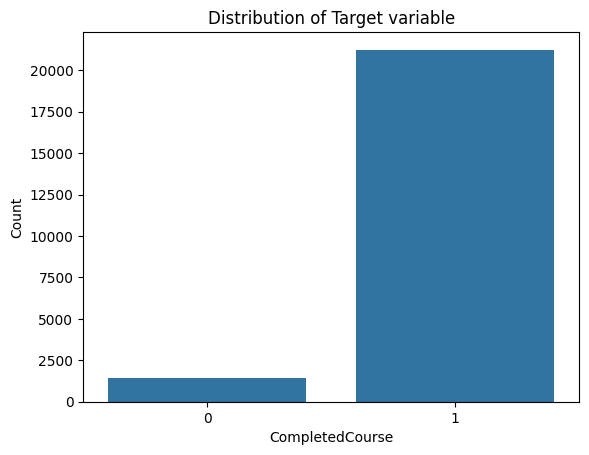

In [ ]:
import matplotlib.pyplot as plt

sns.countplot(x=df['CompletedCourse'], data = df)
plt.title('Distribution of Target variable')
plt.xlabel('CompletedCourse')
plt.ylabel('Count')

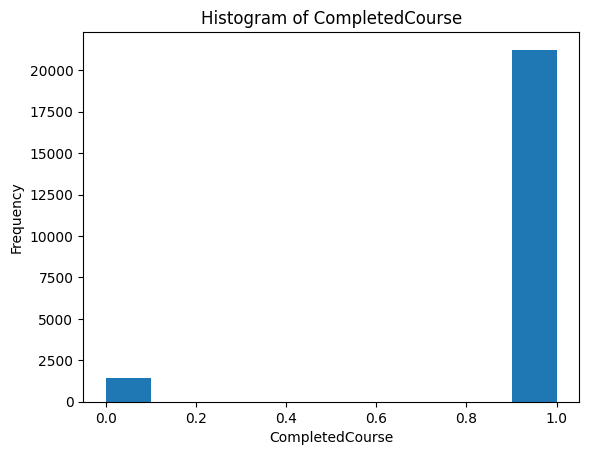

In [ ]:
# histogram for CompletedCourse as requested by rubric

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'CompletedCourse' is the column you want to analyze
plt.hist(df['CompletedCourse'], bins=10)
plt.xlabel('CompletedCourse')
plt.ylabel('Frequency')
plt.title('Histogram of CompletedCourse')
plt.show()


very imbalanced data


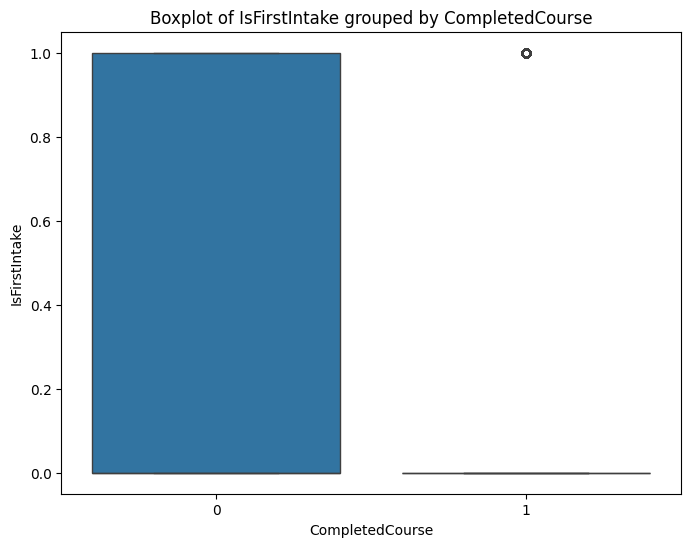

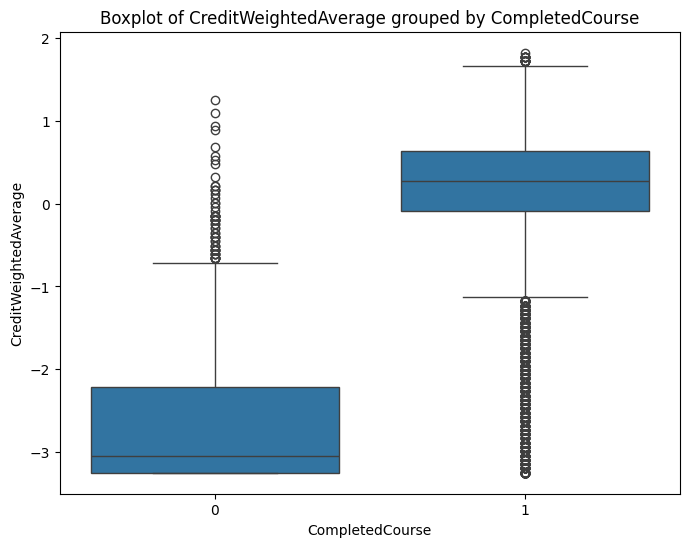

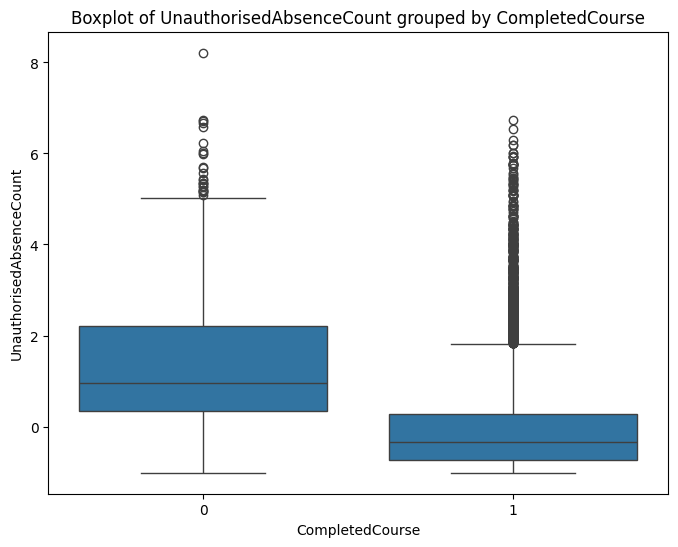

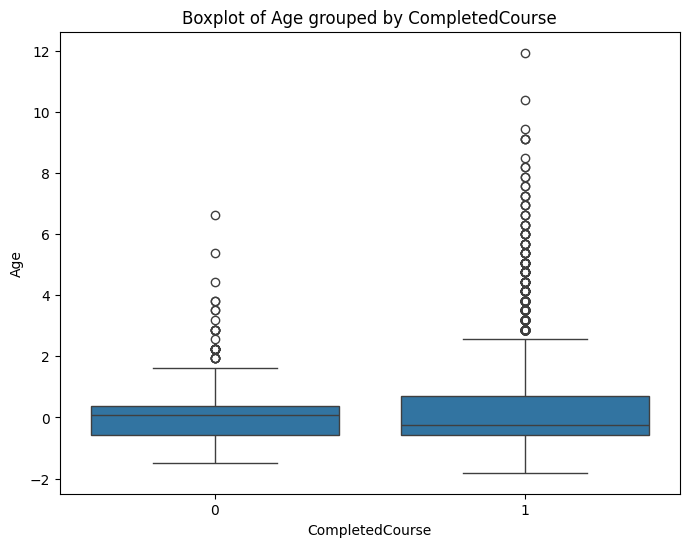

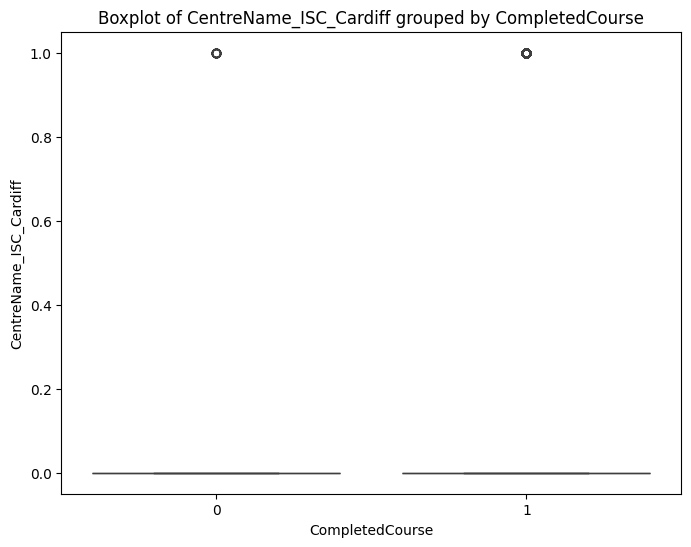

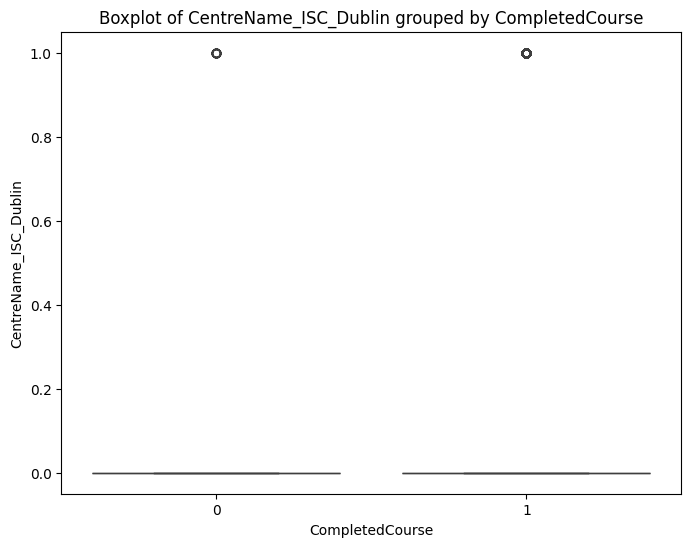

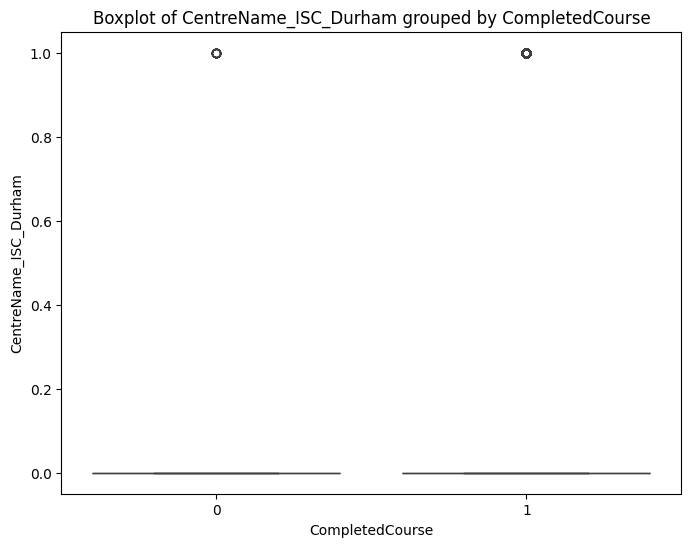

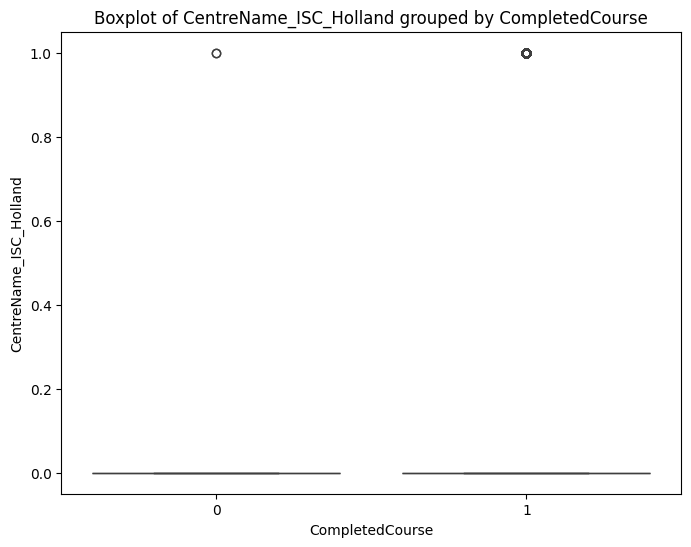

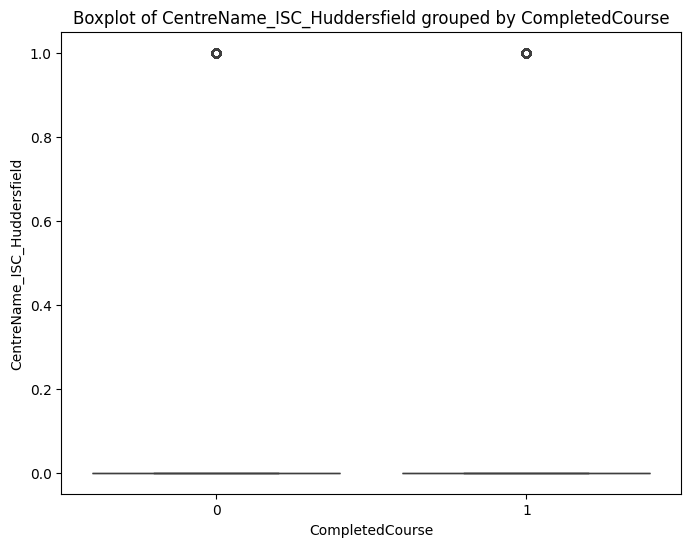

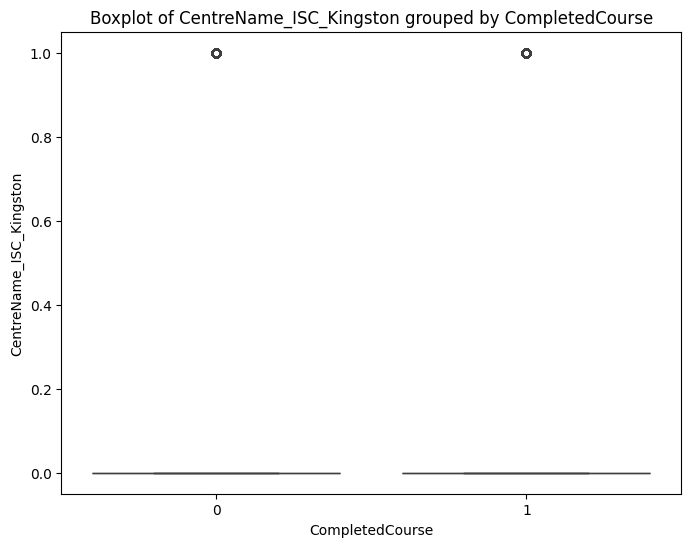

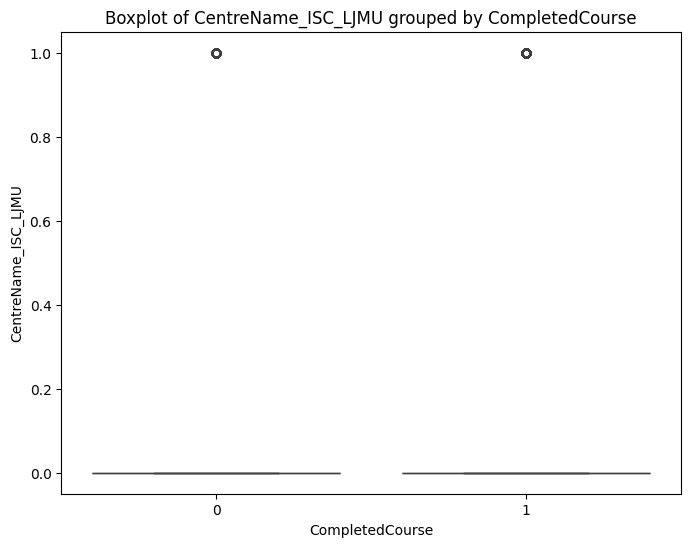

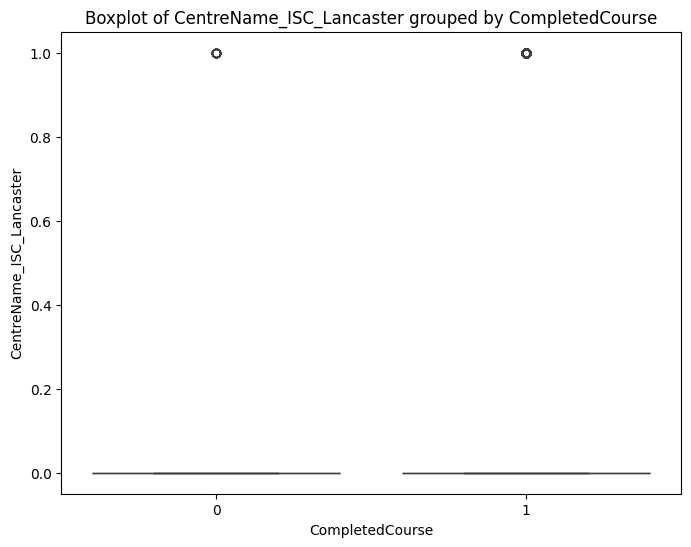

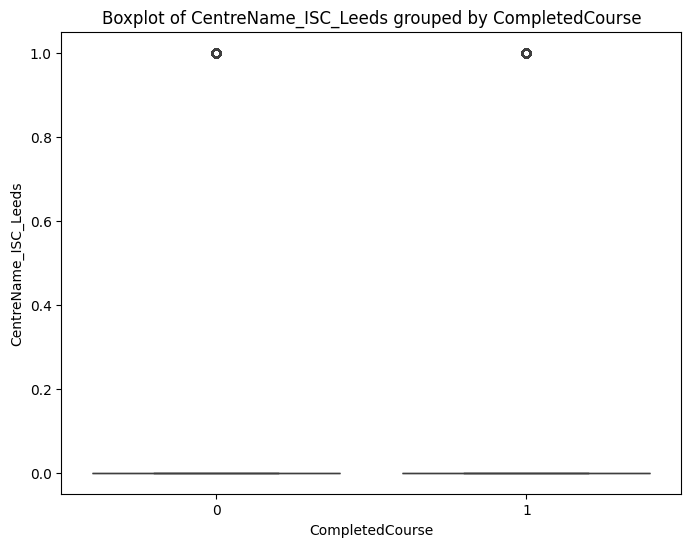

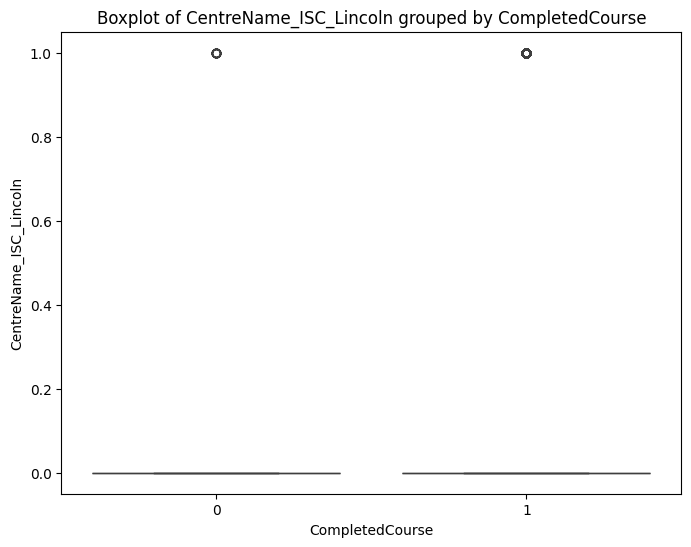

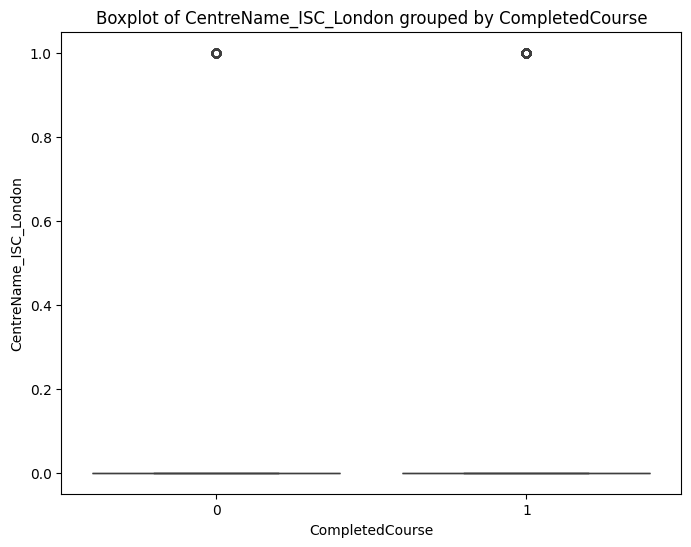

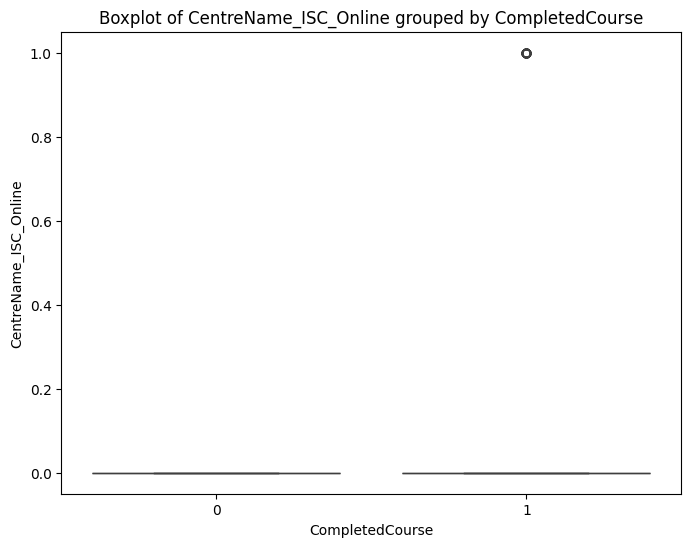

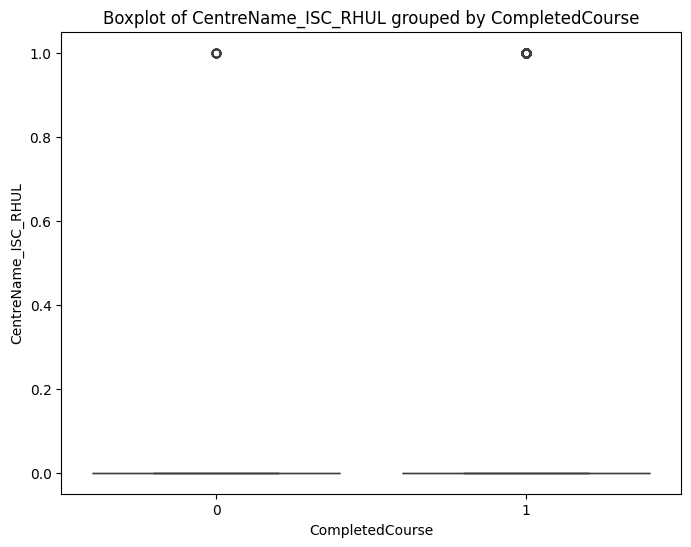

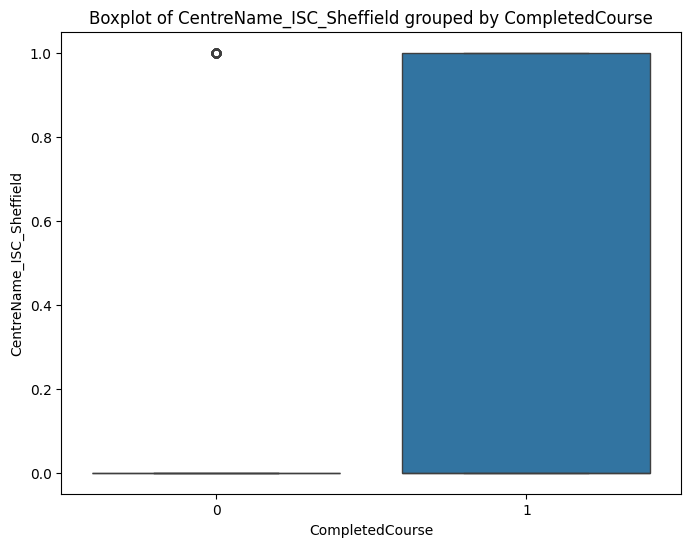

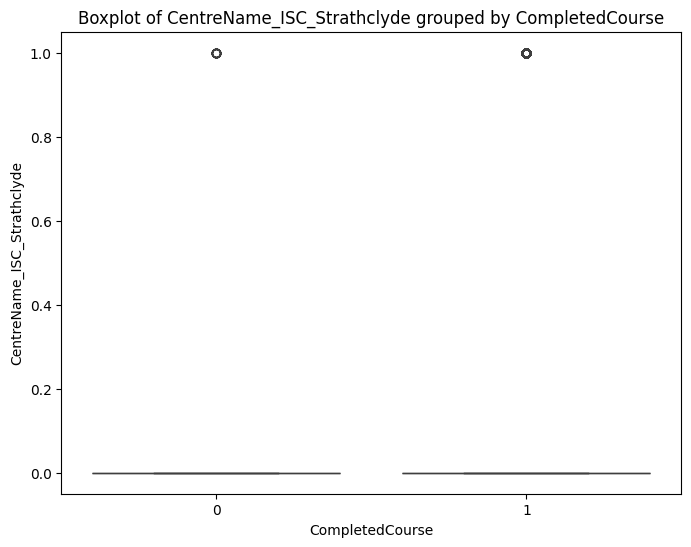

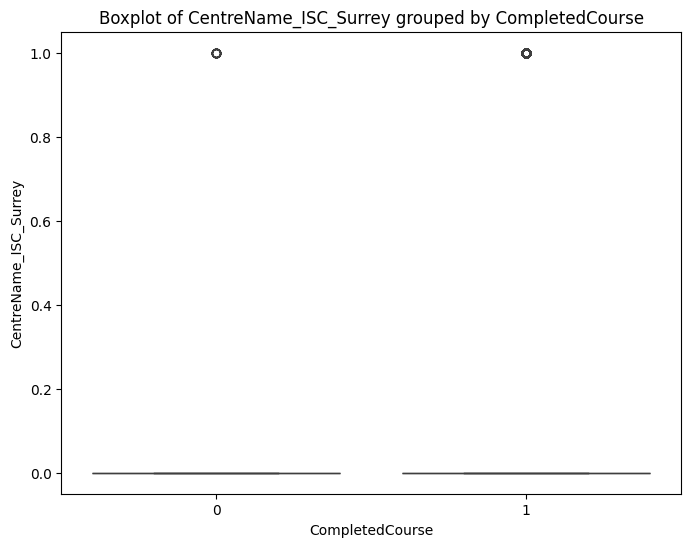

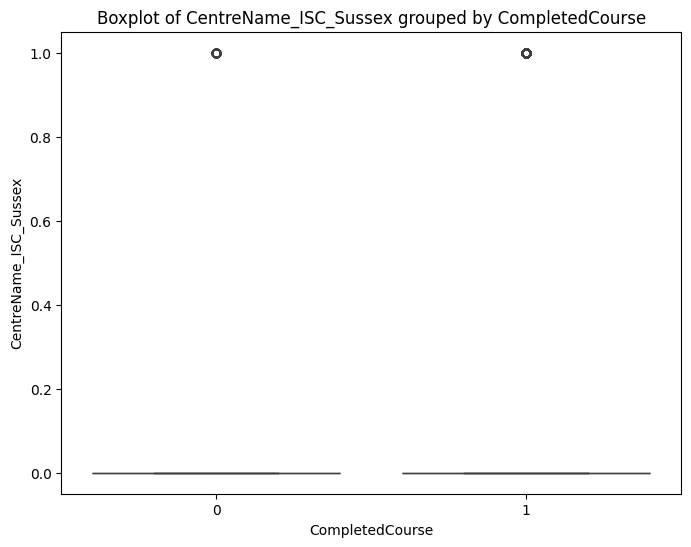

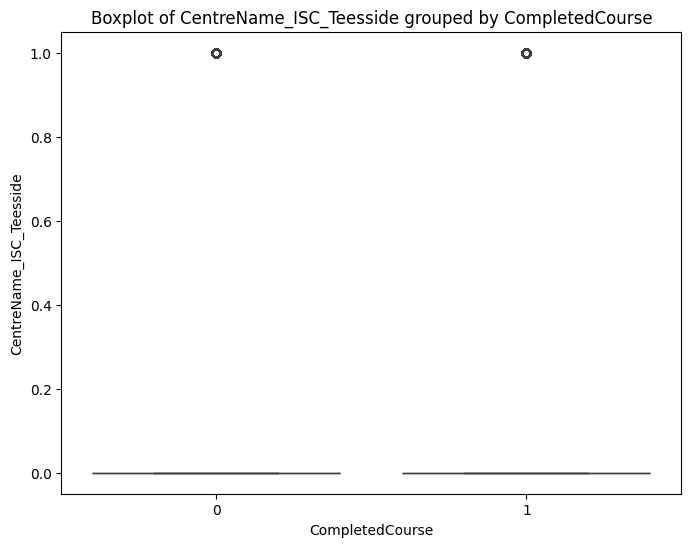

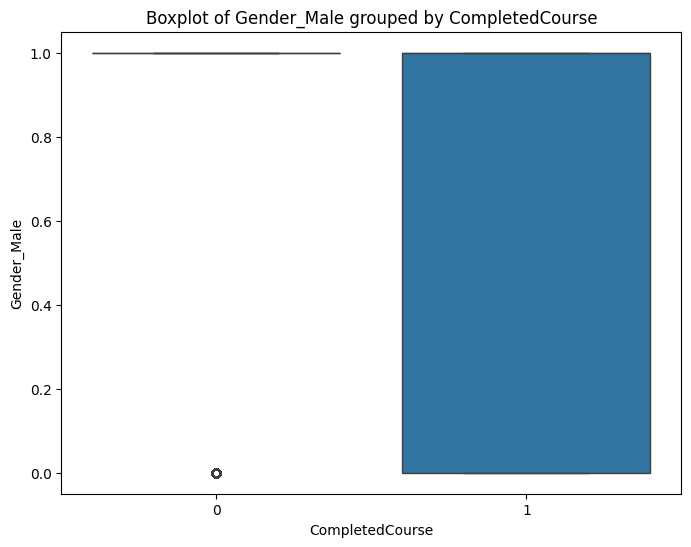

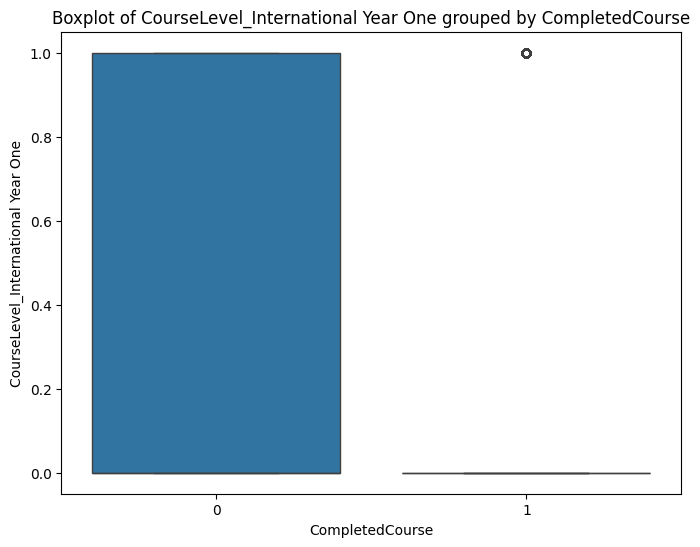

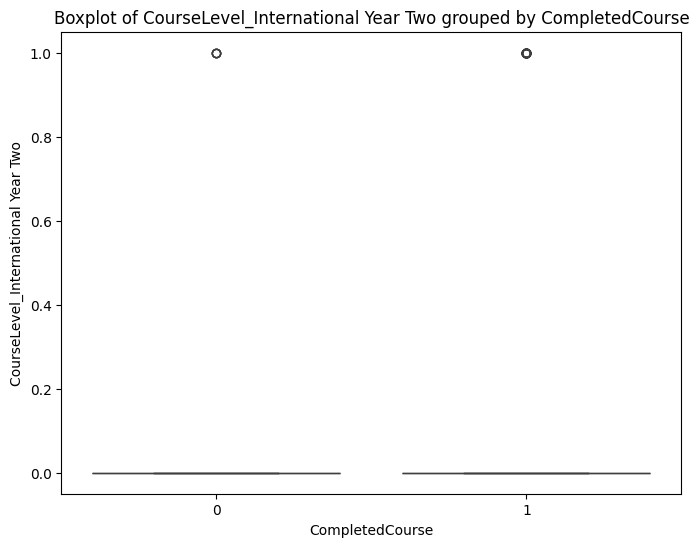

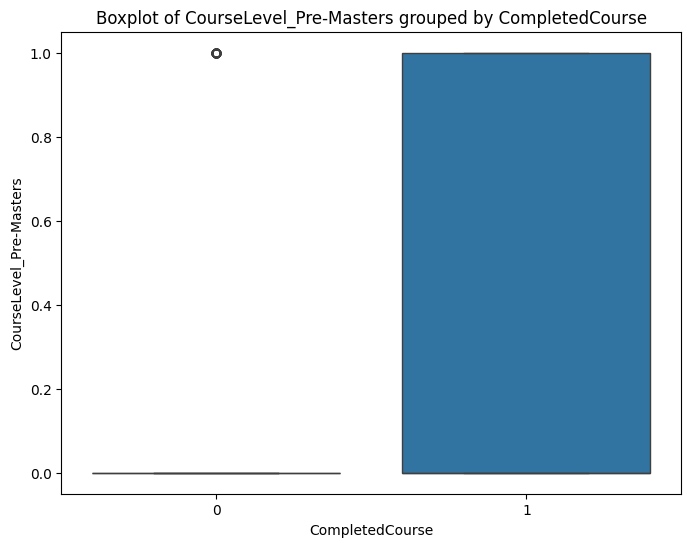

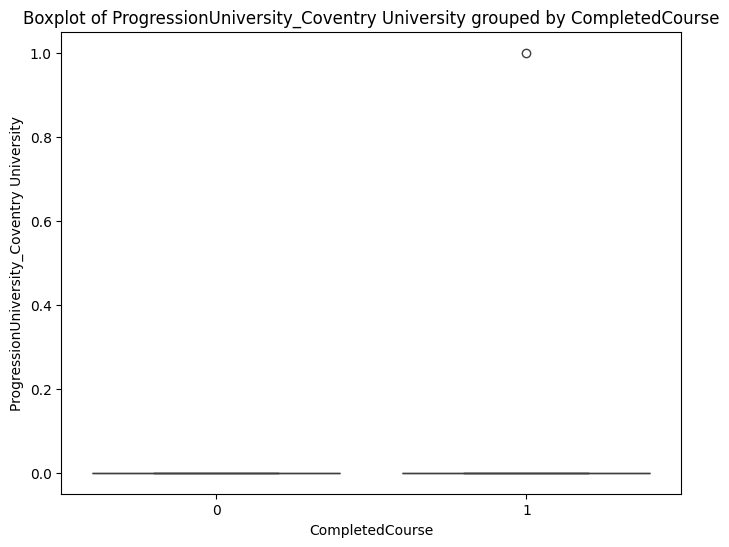

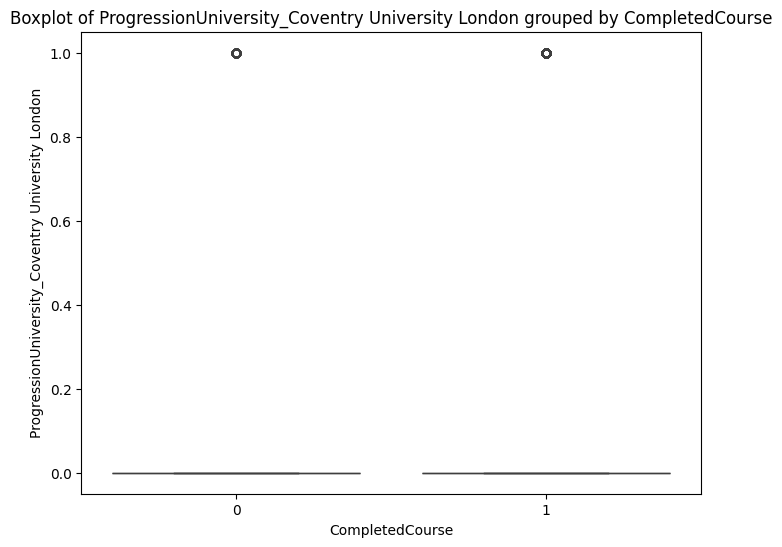

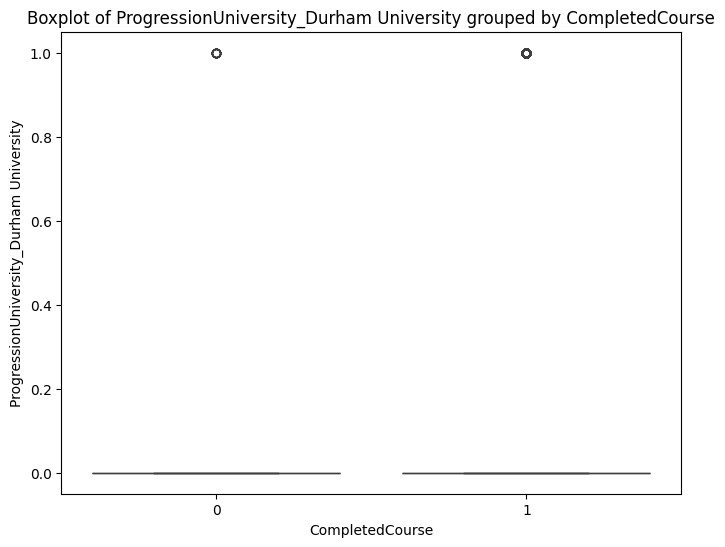

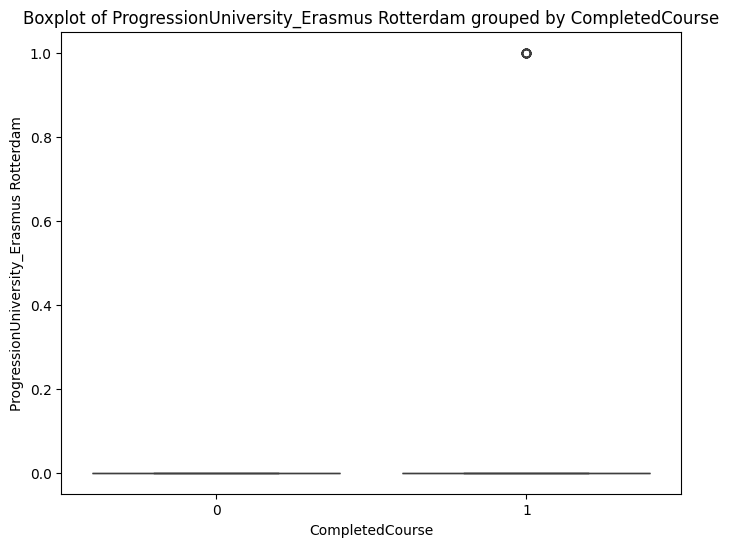

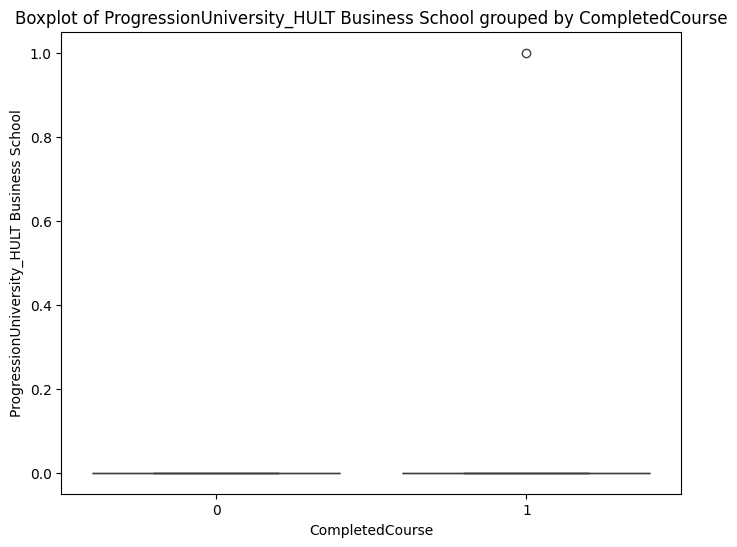

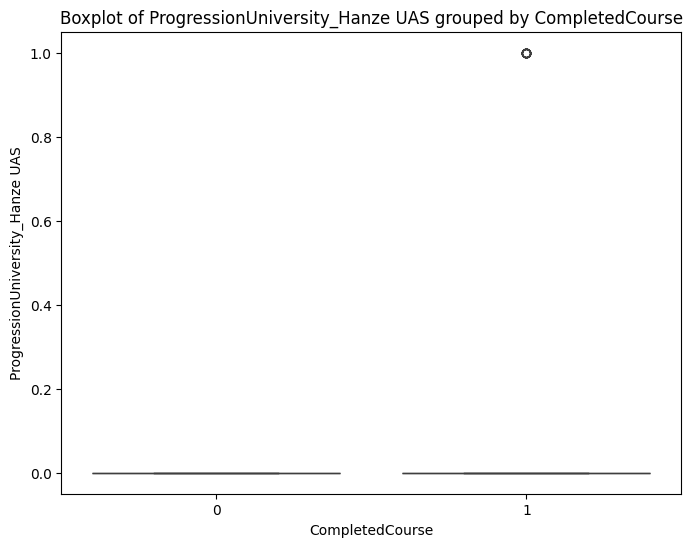

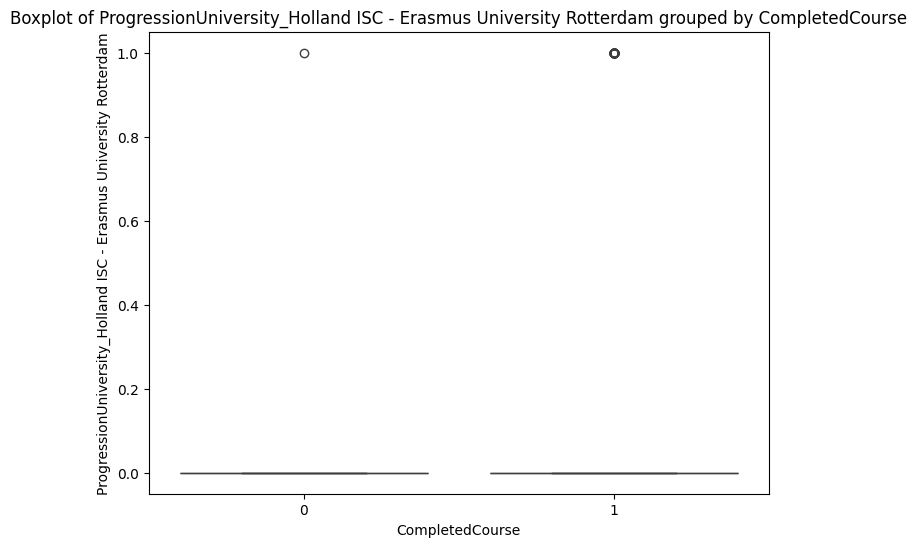

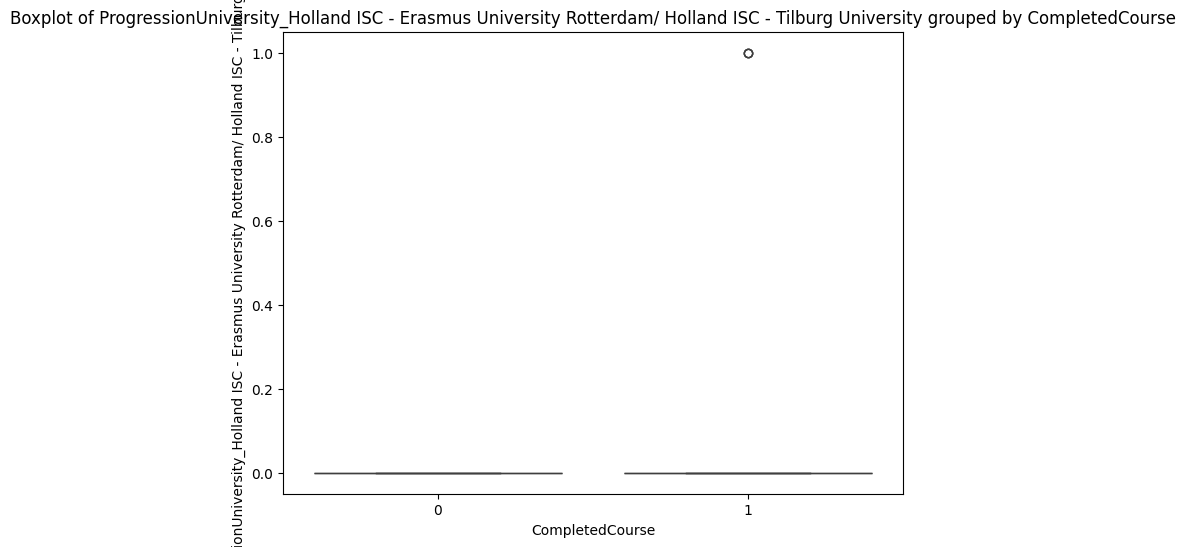

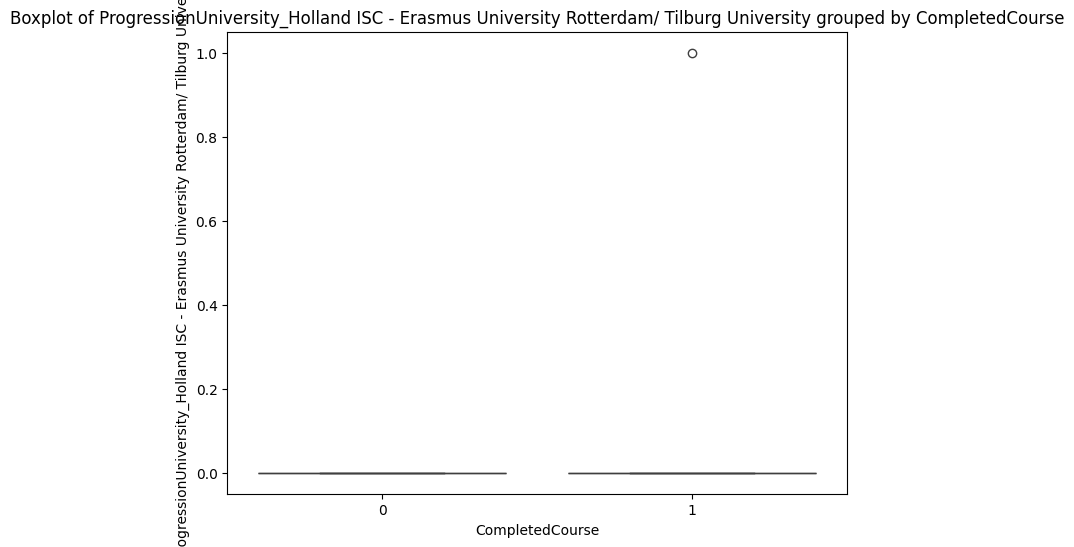

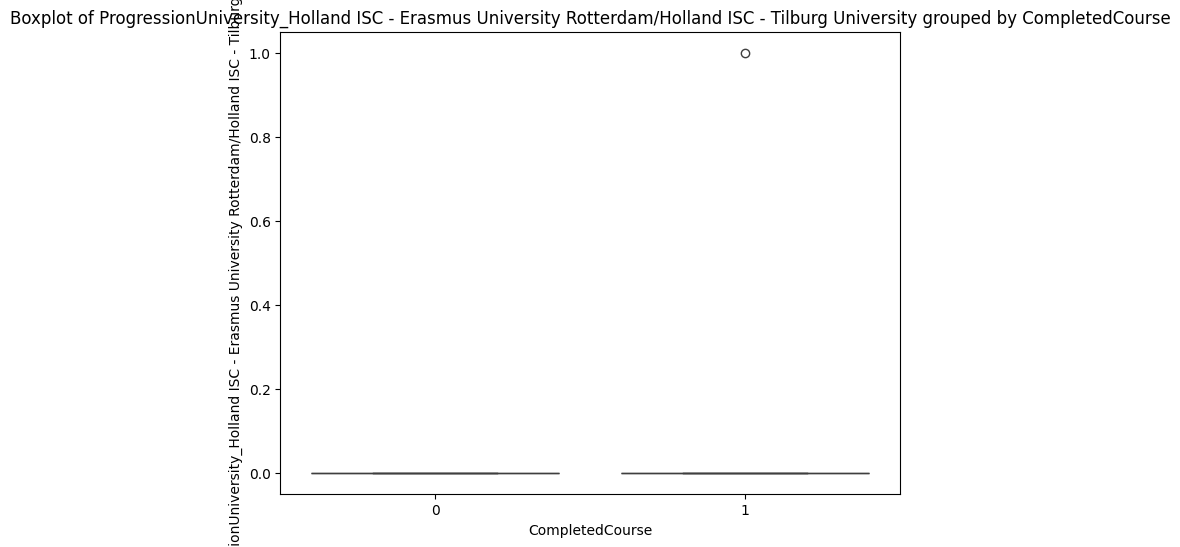

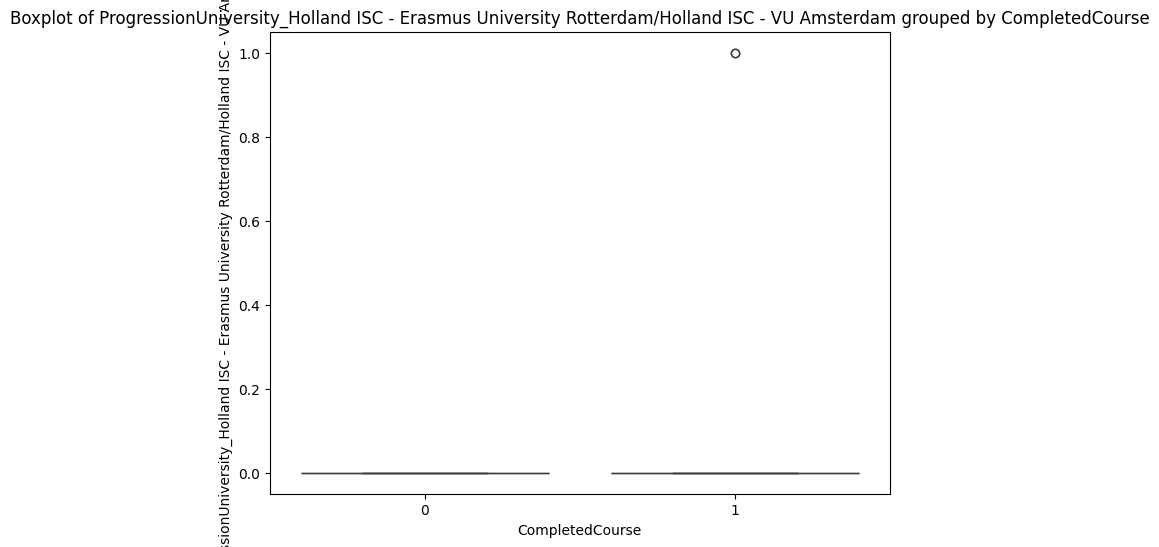

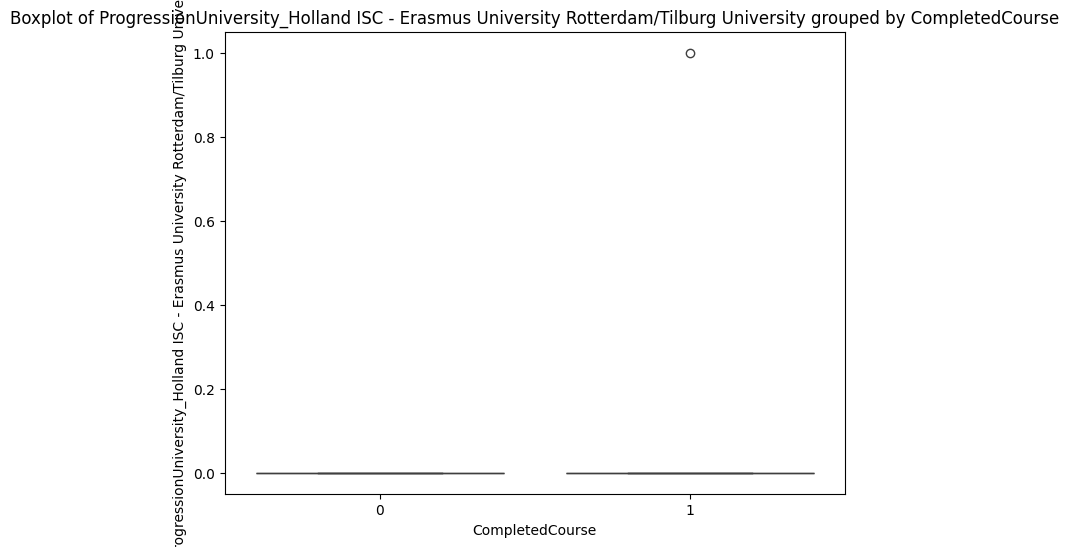

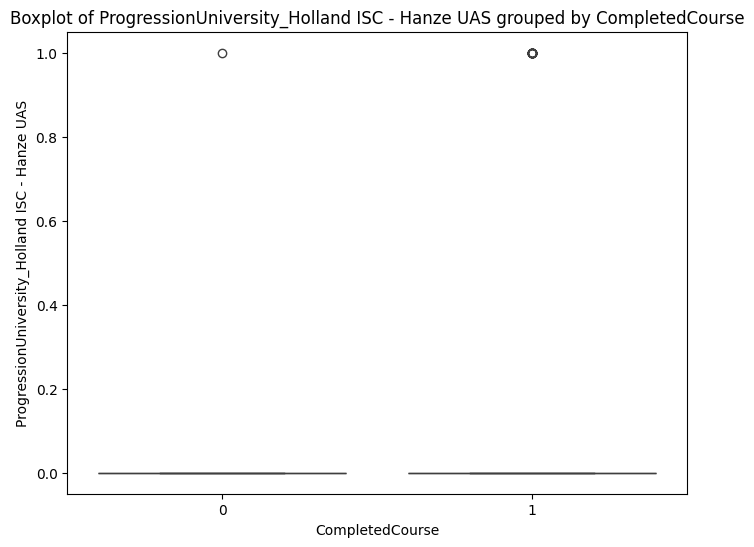

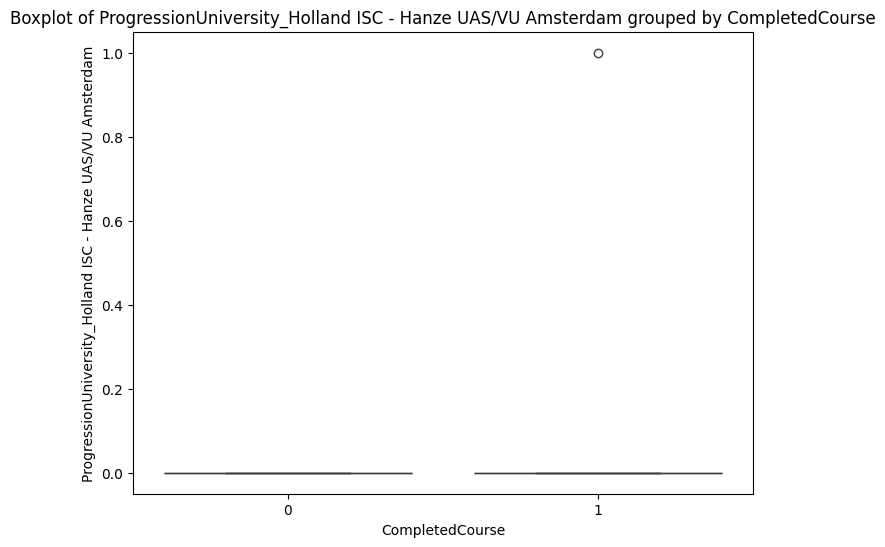

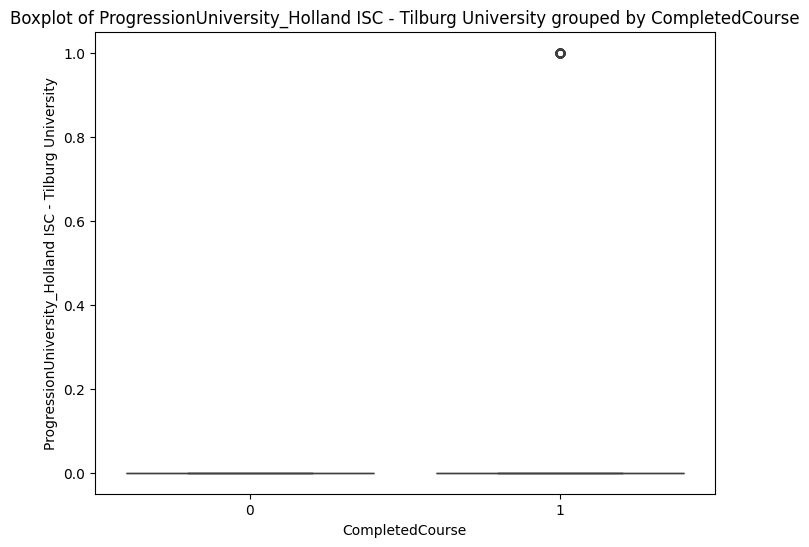

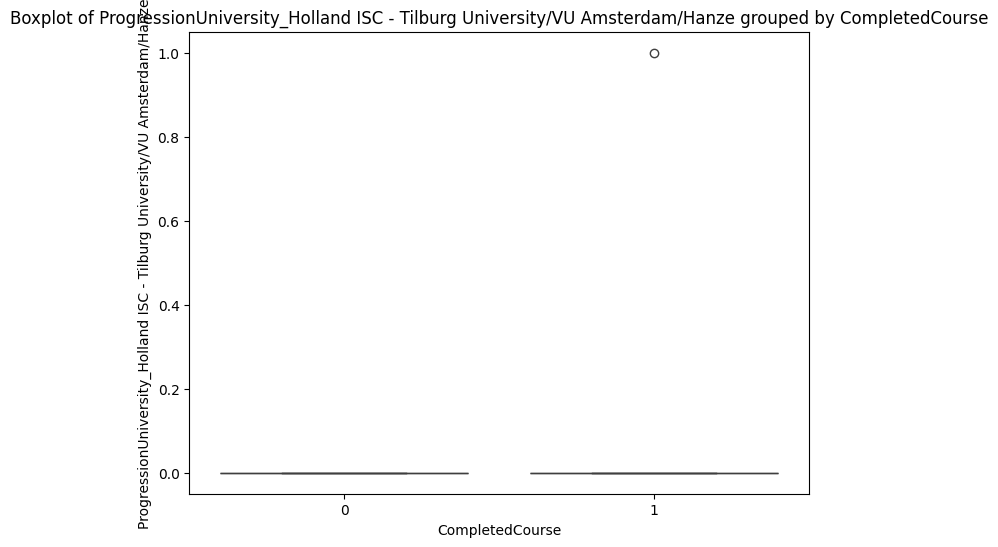

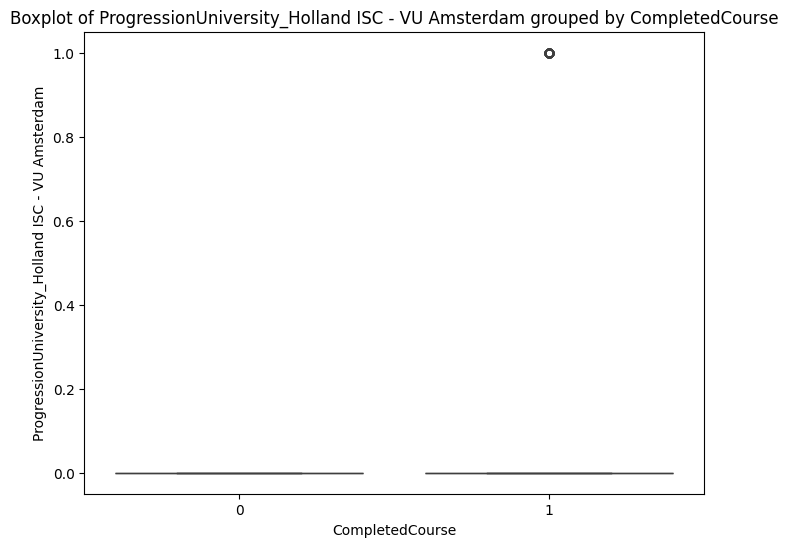

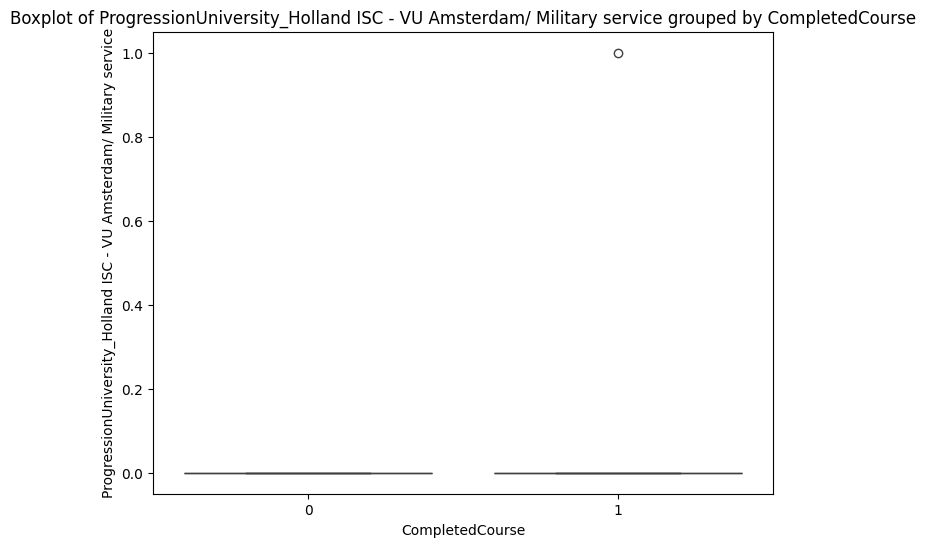

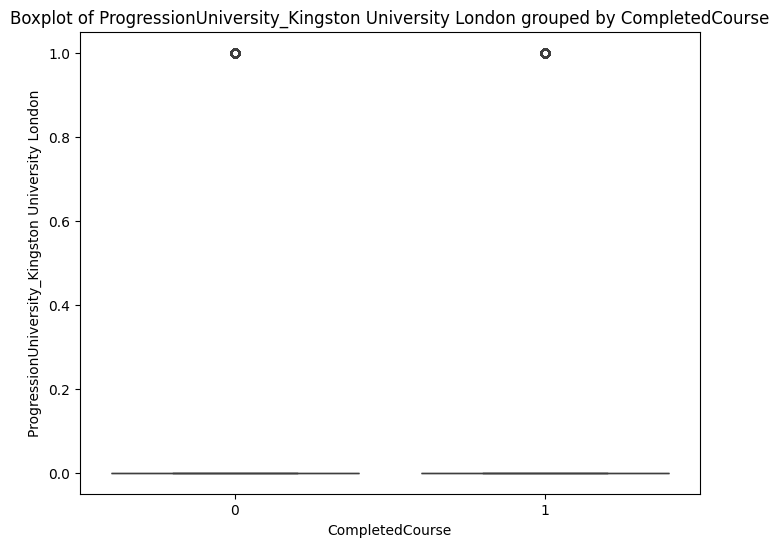

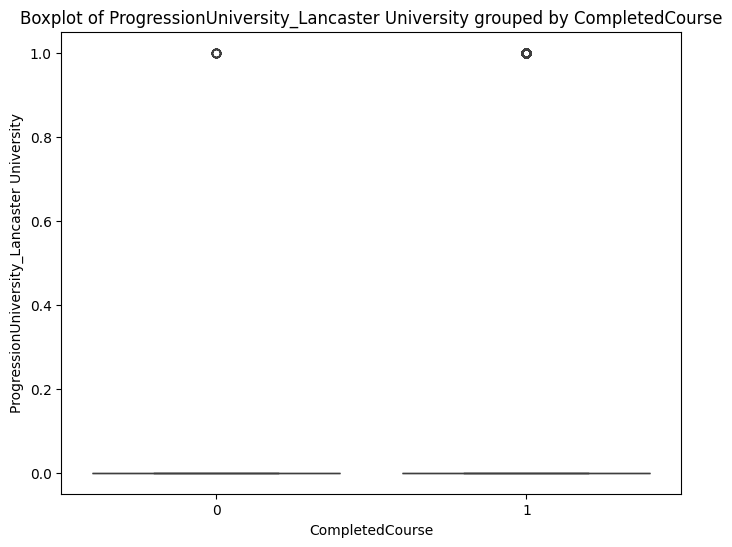

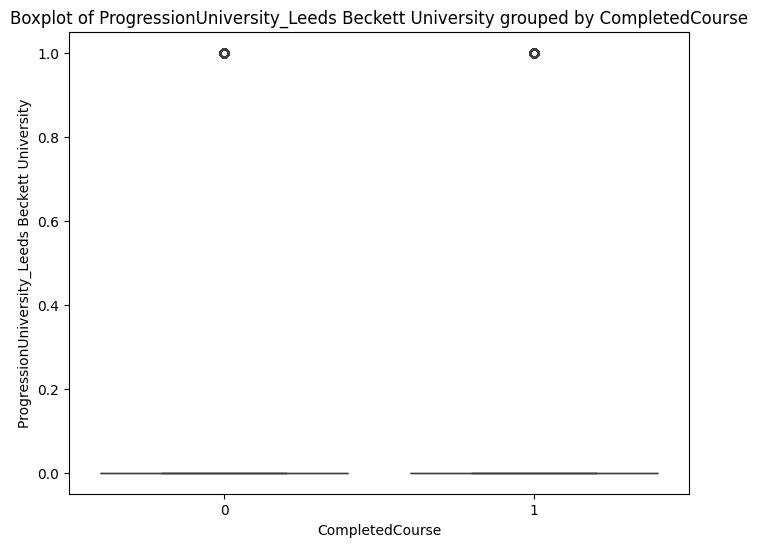

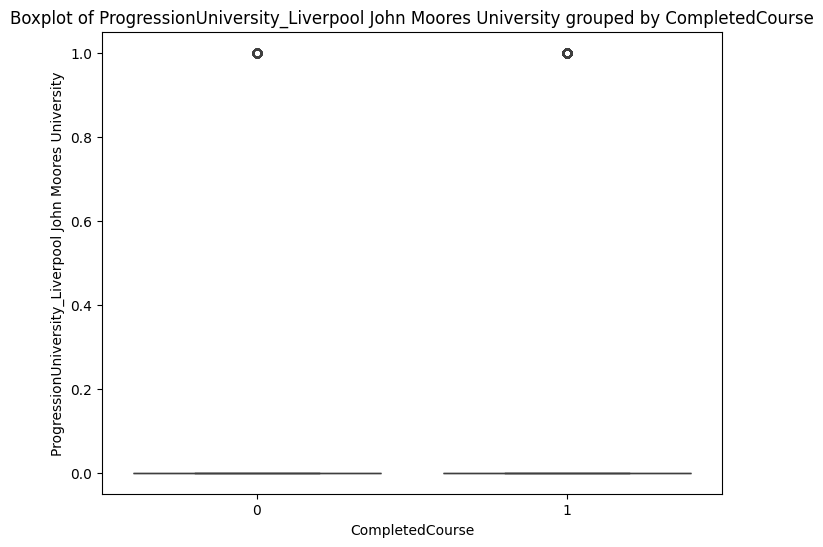

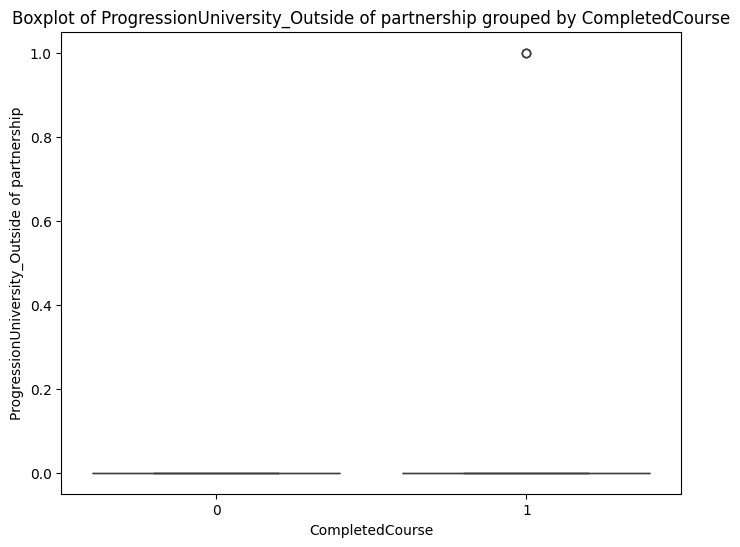

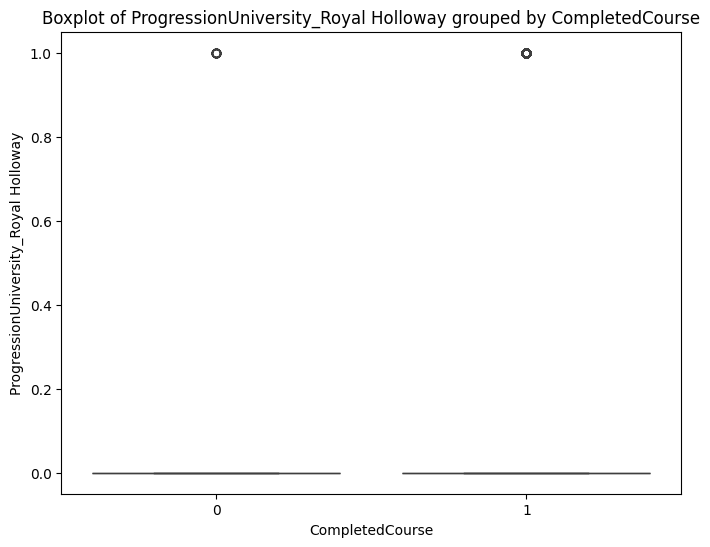

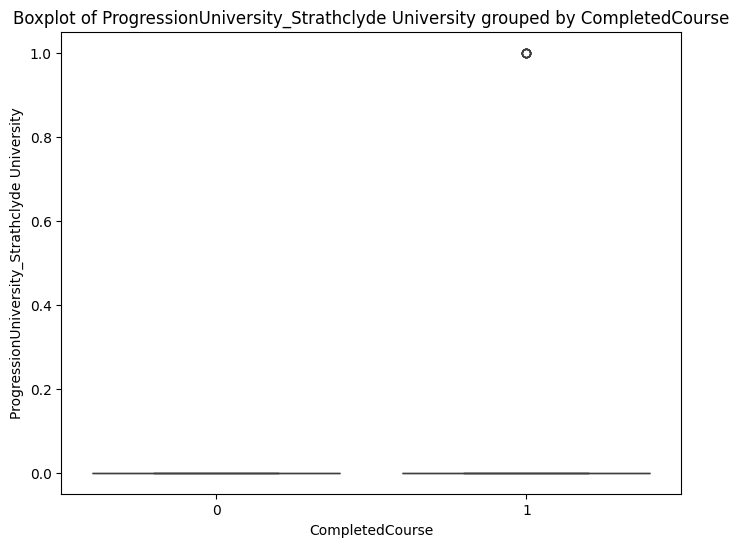

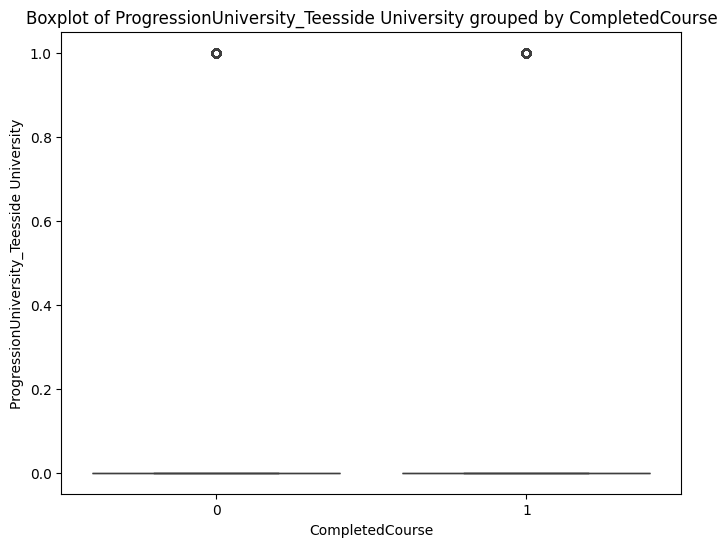

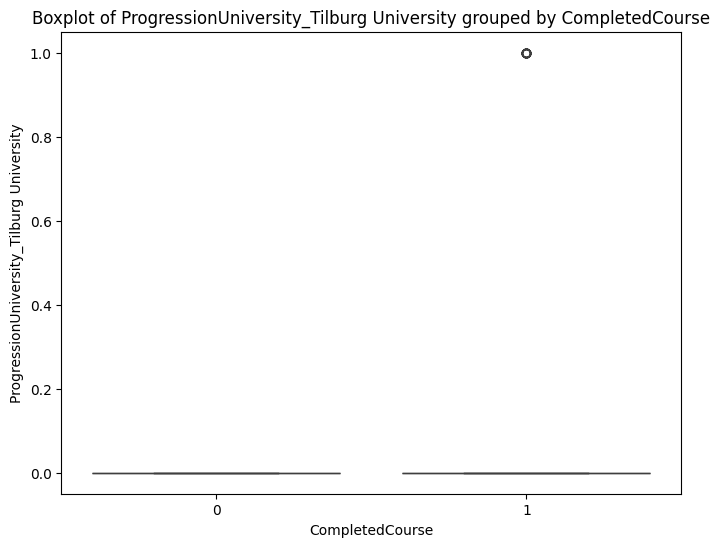

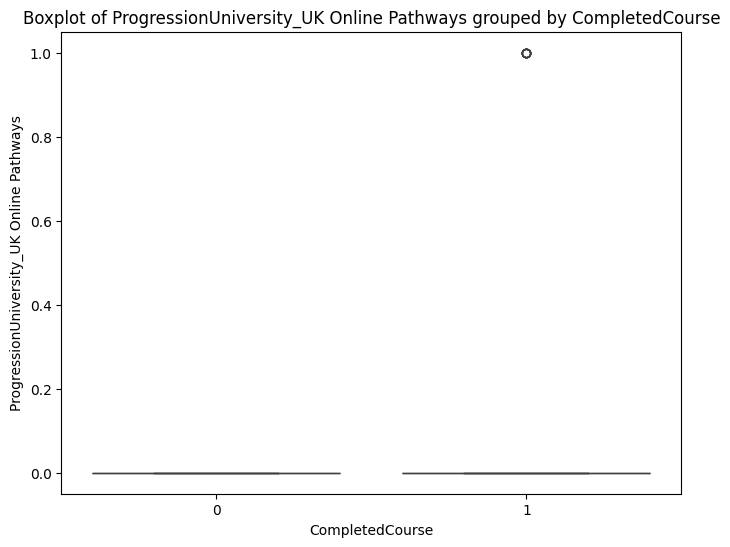

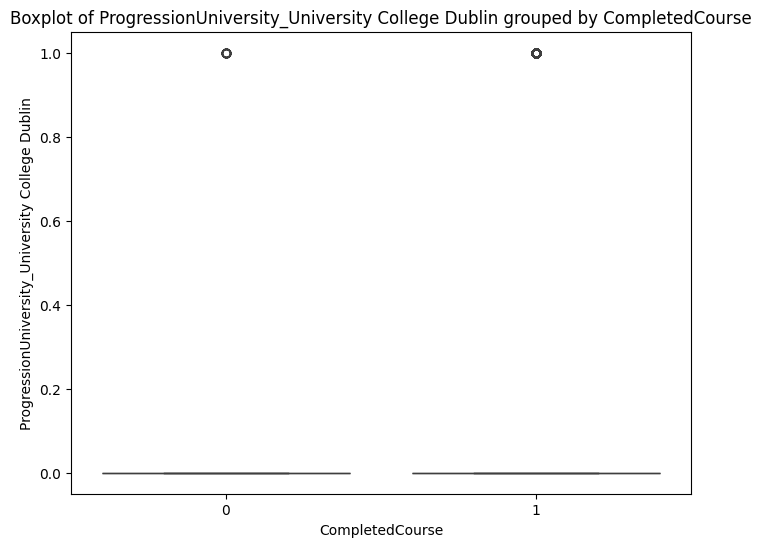

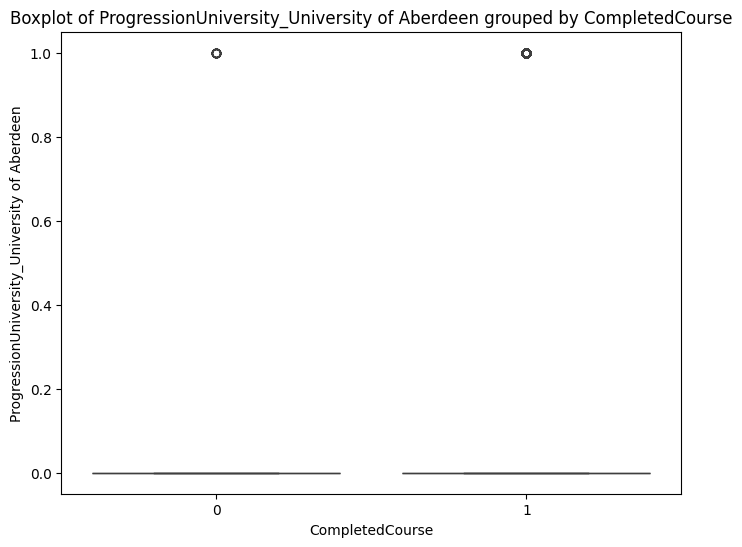

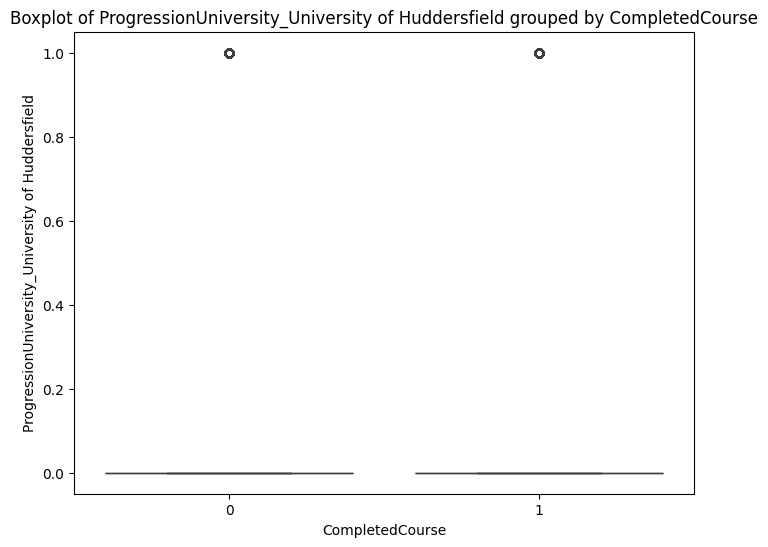

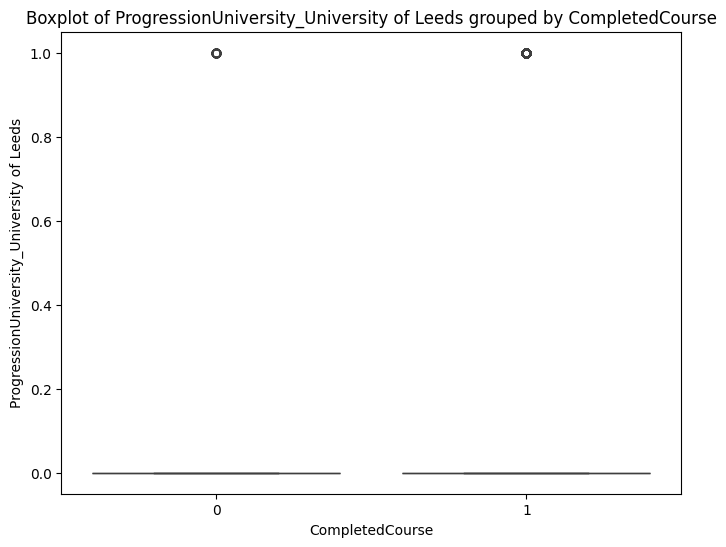

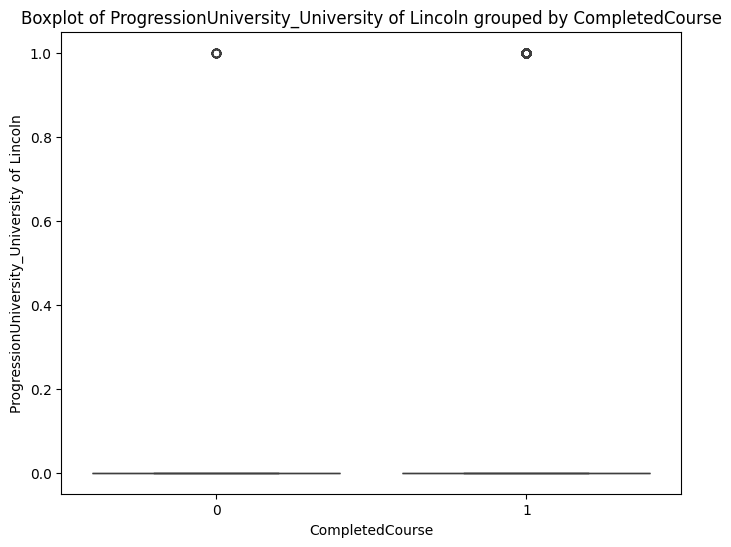

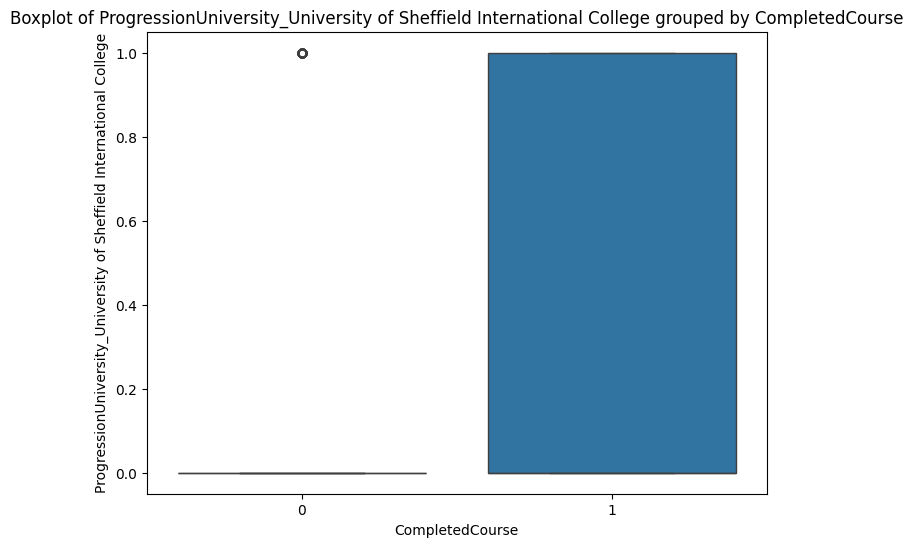

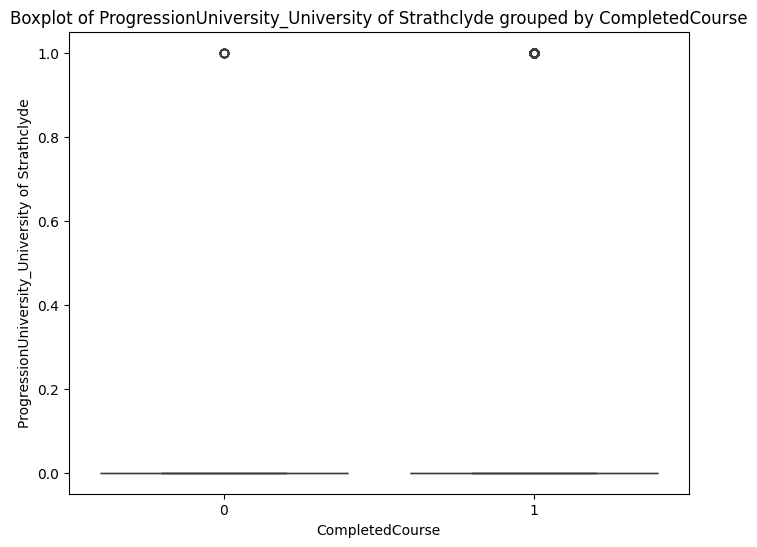

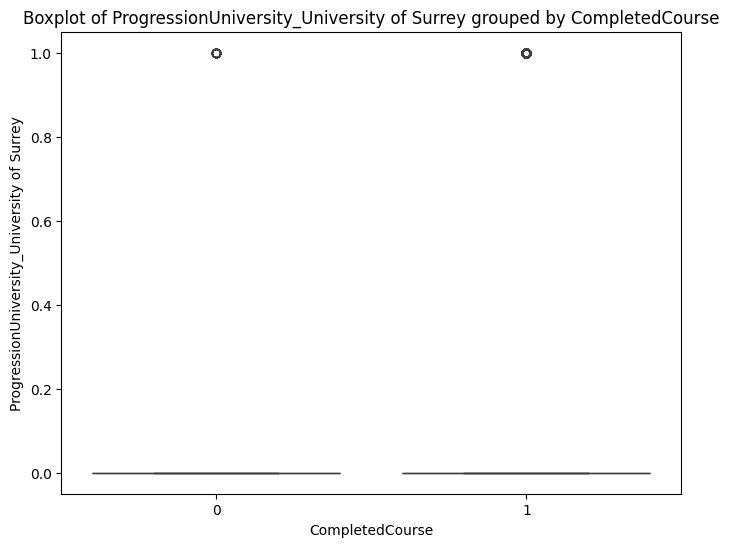

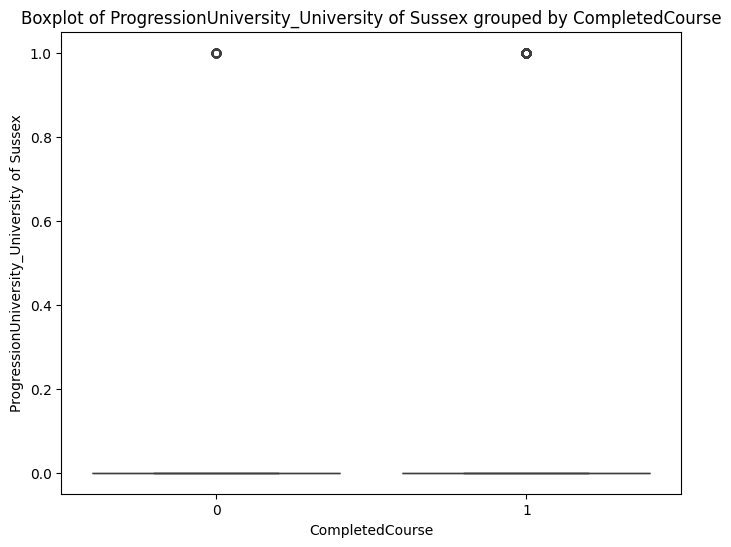

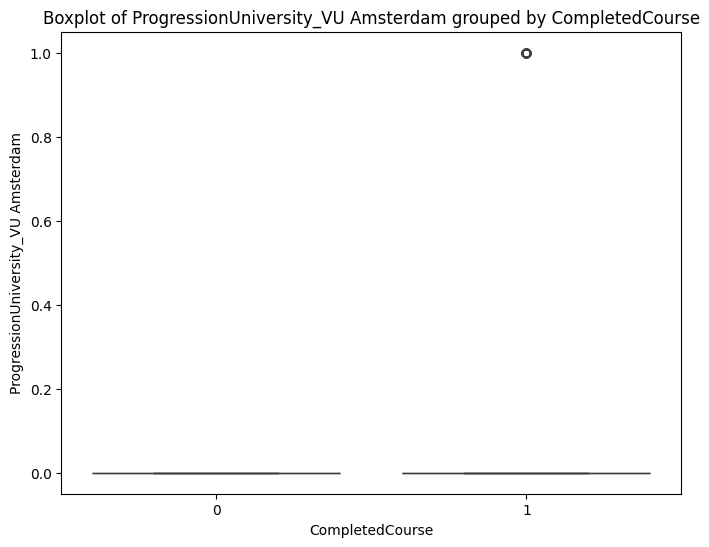

In [ ]:
# boxplots of input features, grouped by target variable CompletedCourse

import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
  if column != 'CompletedCourse':  # Exclude the target variable itself
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='CompletedCourse', y=column, data=df)
    plt.title(f'Boxplot of {column} grouped by CompletedCourse')
    plt.show()


In [ ]:
# split data into training and test set

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'CompletedCourse' is the target variable
X = df.drop('CompletedCourse', axis=1)
y = df['CompletedCourse']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# checking unique values of y_train

print(df['CompletedCourse'].unique())


[1 0]


In [ ]:
X_train.head()

,IsFirstIntake,CreditWeightedAverage,UnauthorisedAbsenceCount,Age,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
3839,0,0.735098,-1.013896,0.688948,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9342,0,0.114110,-0.422115,0.064481,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22314,0,1.200839,-0.556610,-0.559986,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9829,0,1.200839,-1.013896,-1.184453,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17944,0,0.735098,-0.341417,-0.872219,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


# XGBoost Model

In [ ]:
import xgboost as xgb

from sklearn.model_selection import GridSearchCV

XGBoost Model Accuracy: 0.9704715733803437
XGBoost Precision: 0.9808366440757186
XGBoost Recall: 0.9877618263120734
XGBoost AUC: 0.98107838929738

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       289
           1       0.98      0.99      0.98      4249

    accuracy                           0.97      4538
   macro avg       0.89      0.85      0.87      4538
weighted avg       0.97      0.97      0.97      4538



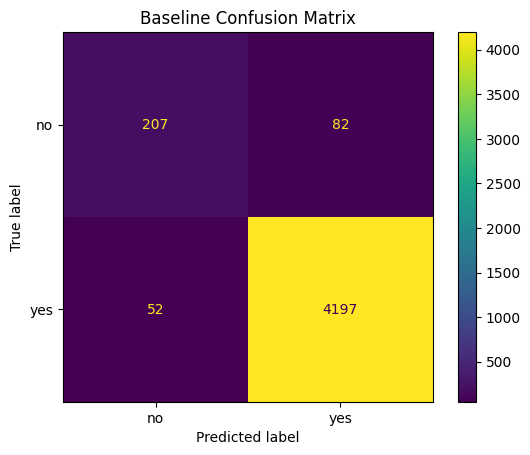

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Step 1: Fit the XGBoost model (baseline)
xg_model = xgb.XGBClassifier(random_state=42)
xg_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
predictions = xg_model.predict(X_test)
predictions_proba = xg_model.predict_proba(X_test)[:, 1]  # For AUC

# Step 3: Save performance metrics
xg_metrics = {
    "xg_accuracy": accuracy_score(y_test, predictions),
    "xg_precision": precision_score(y_test, predictions),
    "xg_recall": recall_score(y_test, predictions),
    "xg_auc": roc_auc_score(y_test, predictions_proba),
    "xg_classification_report": classification_report(y_test, predictions, output_dict=True),
    "xg_confusion_matrix": confusion_matrix(y_test, predictions)
}

# Step 4: Display the saved metrics
print(f"XGBoost Model Accuracy: {xg_metrics['xg_accuracy']}")
print(f"XGBoost Precision: {xg_metrics['xg_precision']}")
print(f"XGBoost Recall: {xg_metrics['xg_recall']}")
print(f"XGBoost AUC: {xg_metrics['xg_auc']}")

# Print the full classification report in a readable format
print("\nClassification Report:\n", classification_report(y_test, predictions))

# Step 5: Display the confusion matrix
ConfusionMatrixDisplay(xg_metrics['xg_confusion_matrix'], display_labels=["no", "yes"]).plot()
plt.title('Baseline Confusion Matrix')
plt.show()


These numbers are very close to  1!

**However what we really want to be big is the recall number for the 0 Class (the drop-outs), and this is only 0.75**

OK - at this point I am trying something else, I will account
for the low % of 0s compared to 1s and use scale_pos_weight


XGBoost Model Accuracy (Weighted): 0.9563684442485677
XGBoost Precision (Weighted): 0.9927025054731209
XGBoost Recall (Weighted): 0.9604612850082372
XGBoost AUC (Weighted): 0.9791422528891391

Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.61      0.90      0.72       289
           1       0.99      0.96      0.98      4249

    accuracy                           0.96      4538
   macro avg       0.80      0.93      0.85      4538
weighted avg       0.97      0.96      0.96      4538



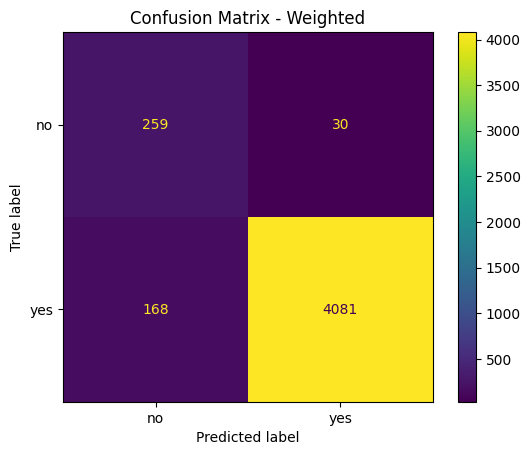

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Step 1: Fit the XGBoost model (adjusted with scale_pos_weight)
scale_pos_weight_value = (len(y_train) - sum(y_train)) / sum(y_train)
xg_model_weighted = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight_value, random_state=42)

xg_model_weighted.fit(X_train, y_train)

# Step 2: Make predictions on the test set
predictions_weighted = xg_model_weighted.predict(X_test)
predictions_proba_weighted = xg_model_weighted.predict_proba(X_test)[:, 1]  # For AUC

# Step 3: Save performance metrics
xg_metrics_weighted = {
    "xg_accuracy": accuracy_score(y_test, predictions_weighted),
    "xg_precision": precision_score(y_test, predictions_weighted),
    "xg_recall": recall_score(y_test, predictions_weighted),
    "xg_auc": roc_auc_score(y_test, predictions_proba_weighted),
    "xg_classification_report": classification_report(y_test, predictions_weighted, output_dict=True),
    "xg_confusion_matrix": confusion_matrix(y_test, predictions_weighted)
}

# Step 4: Display the saved metrics
print(f"XGBoost Model Accuracy (Weighted): {xg_metrics_weighted['xg_accuracy']}")
print(f"XGBoost Precision (Weighted): {xg_metrics_weighted['xg_precision']}")
print(f"XGBoost Recall (Weighted): {xg_metrics_weighted['xg_recall']}")
print(f"XGBoost AUC (Weighted): {xg_metrics_weighted['xg_auc']}")

# Print the full classification report in a readable format
print("\nClassification Report (Weighted):\n", classification_report(y_test, predictions_weighted))

# Step 5: Display the confusion matrix
ConfusionMatrixDisplay(xg_metrics_weighted['xg_confusion_matrix'], display_labels=["no", "yes"]).plot()
plt.title('Confusion Matrix - Weighted')
plt.show()


Recall for 0 is up to 0.9 - a good choice. Now for hyperparameter tuning

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Tuned XGBoost Model Accuracy: 0.9431467606875276
Tuned XGBoost Precision: 0.9952841896252171
Tuned XGBoost Recall: 0.9437514709343375
Tuned XGBoost AUC: 0.98164273946811

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.53      0.93      0.68       289
           1       1.00      0.94      0.97      4249

    accuracy                           0.94      4538
   macro avg       0.76      0.94      0.82      4538
weighted avg       0.97      0.94      0.95      4538



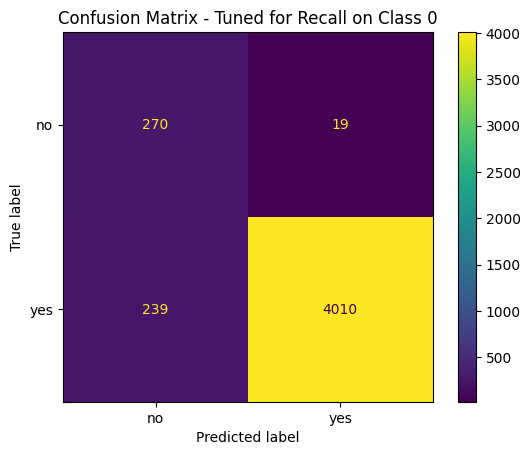

In [ ]:
from sklearn.metrics import make_scorer, recall_score

# Define a custom scorer that optimizes for recall of class 0 (students dropping out)
def recall_class_0(y_true, y_pred):
    return recall_score(y_true, y_pred, pos_label=0)

recall_0_scorer = make_scorer(recall_class_0)

# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Step 3: Set up the XGBoost model with class weights
scale_pos_weight_value = (len(y_train) - sum(y_train)) / sum(y_train)
xg_model_tuned = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight_value, random_state=42)

# Step 4: Perform GridSearchCV for tuning, optimizing for recall on class 0
grid_search = GridSearchCV(estimator=xg_model_tuned, param_grid=param_grid, scoring=recall_0_scorer, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Step 5: Best hyperparameters and model
best_params = grid_search.best_params_  # Best parameters
best_xg_model = grid_search.best_estimator_

# Display the best parameters
print(f"Best hyperparameters found: {best_params}")
# Step 6: Make predictions on the test set
predictions_tuned = best_xg_model.predict(X_test)
predictions_proba_tuned = best_xg_model.predict_proba(X_test)[:, 1]

# Step 7: Save performance metrics
xg_metrics_tuned_recall_0 = {
    "xg_accuracy": accuracy_score(y_test, predictions_tuned),
    "xg_precision": precision_score(y_test, predictions_tuned),
    "xg_recall": recall_score(y_test, predictions_tuned),
    "xg_auc": roc_auc_score(y_test, predictions_proba_tuned),
    "xg_classification_report": classification_report(y_test, predictions_tuned, output_dict=True),
    "xg_confusion_matrix": confusion_matrix(y_test, predictions_tuned)
}

# Display performance metrics
print(f"Tuned XGBoost Model Accuracy: {xg_metrics_tuned_recall_0['xg_accuracy']}")
print(f"Tuned XGBoost Precision: {xg_metrics_tuned_recall_0['xg_precision']}")
print(f"Tuned XGBoost Recall: {xg_metrics_tuned_recall_0['xg_recall']}")
print(f"Tuned XGBoost AUC: {xg_metrics_tuned_recall_0['xg_auc']}")

# Print the full classification report
print("\nClassification Report (Tuned):\n", classification_report(y_test, predictions_tuned))

# Step 8: Display the confusion matrix
ConfusionMatrixDisplay(xg_metrics_tuned_recall_0['xg_confusion_matrix'], display_labels=["no", "yes"]).plot()
plt.title('Confusion Matrix - Tuned for Recall on Class 0')
plt.show()


Up to 0.93 - so only 7% of students that are dropping out are being missed.

In [ ]:
baseline_xg_report = pd.DataFrame(xg_metrics['xg_classification_report']).transpose()
weighted_xg_report = pd.DataFrame(xg_metrics_weighted['xg_classification_report']).transpose()
tuned_xg_report = pd.DataFrame(xg_metrics_tuned_recall_0['xg_classification_report']).transpose()

print(f"Baseline XGBoost Report: {baseline_xg_report}")
print("\n")
print(f"Weight XGBoost Report: {weighted_xg_report}")
print("\n")
print(f"Weighted and Tuned XGBoost Report: {tuned_xg_report}")

Baseline XGBoost Report:               precision    recall  f1-score      support
0              0.799228  0.716263  0.755474   289.000000
1              0.980837  0.987762  0.984287  4249.000000
accuracy       0.970472  0.970472  0.970472     0.970472
macro avg      0.890032  0.852012  0.869881  4538.000000
weighted avg   0.969271  0.970472  0.969715  4538.000000


Weight XGBoost Report:               precision    recall  f1-score      support
0              0.606557  0.896194  0.723464   289.000000
1              0.992703  0.960461  0.976316  4249.000000
accuracy       0.956368  0.956368  0.956368     0.956368
macro avg      0.799630  0.928328  0.849890  4538.000000
weighted avg   0.968111  0.956368  0.960213  4538.000000


Weighted and Tuned XGBoost Report:               precision    recall  f1-score      support
0              0.530452  0.934256  0.676692   289.000000
1              0.995284  0.943751  0.968833  4249.000000
accuracy       0.943147  0.943147  0.943147     0.943147
m

Text(0.5, 1.0, 'Weighted and tuned')

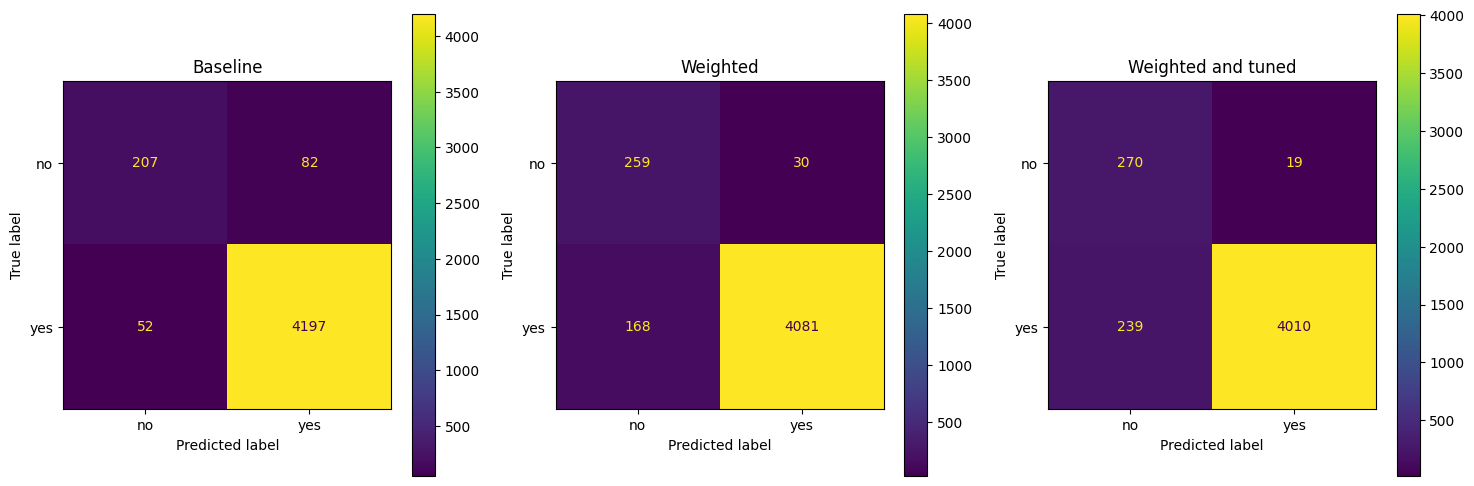

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
ConfusionMatrixDisplay(xg_metrics['xg_confusion_matrix'], display_labels=["no", "yes"]).plot(ax=axs[0])
axs[0].set_title('Baseline')

ConfusionMatrixDisplay(xg_metrics_weighted['xg_confusion_matrix'], display_labels=["no", "yes"]).plot(ax=axs[1])
axs[1].set_title('Weighted')

ConfusionMatrixDisplay(xg_metrics_tuned_recall_0['xg_confusion_matrix'], display_labels=["no", "yes"]).plot(ax=axs[2])
axs[2].set_title('Weighted and tuned')

Here we can clearly see that the false positives decrease from 82 to 30 to 19 showing that we are taking the right steps to ensure the number of students who we don't see as being dropout risks is as small as possible

In [ ]:
# Read the original CSV again to get the dropped columns
original_df = pd.read_csv('https://drive.google.com/uc?id=1rKxv26grdaO6KuN8ZGQX5C-eZ0N6o_hg&export=download')

In [ ]:
X['ContactHours'] = original_df['ContactHours']
X['AttendancePercentage'] = original_df['AttendancePercentage']

# Standardizing the two columns
scaler = StandardScaler()
X[['ContactHours', 'AttendancePercentage']] = scaler.fit_transform(X[['ContactHours', 'AttendancePercentage']])

X.head()

,IsFirstIntake,CreditWeightedAverage,UnauthorisedAbsenceCount,Age,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,...,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam,ContactHours,AttendancePercentage
1,0,0.528102,-0.879400,0.688948,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.685259,0.777768
2,0,0.165859,-0.852501,0.064481,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.581919,0.777768
3,1,0.424604,-0.610409,0.376714,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.043335,0.585770
5,1,0.786847,-0.933198,0.064481,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.219712,0.905767
7,0,0.269357,-0.341417,-0.559986,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.694654,0.073775


Now re-train on tuned model (because it has fewer false positives / better recall)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Accuracy with new features: 0.9363155575143235
Precision with new features: 0.9962406015037594
Recall with new features: 0.9355142386443869
AUC with new features: 0.9807713762896378

Classification Report (Weighted, Tuned, New Features):
               precision    recall  f1-score   support

           0       0.50      0.95      0.65       289
           1       1.00      0.94      0.96      4249

    accuracy                           0.94      4538
   macro avg       0.75      0.94      0.81      4538
weighted avg       0.96      0.94      0.95      4538



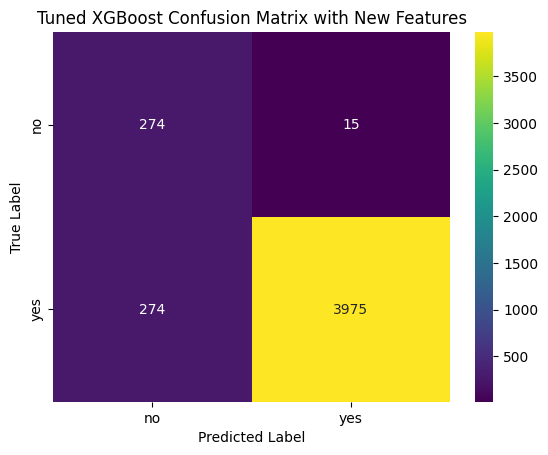

In [ ]:
# Weighted, tuned XGBoost with extra features

# Step 1: Set up the XGBoost model with class weights
scale_pos_weight_value = (len(y_train) - sum(y_train)) / sum(y_train)
xg_model_tuned = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight_value,
    random_state=42,
    learning_rate=0.01,  # Best found value
    max_depth=3,         # Best found value
    n_estimators=100     # Best found value
)

# Step 2: Fit the model with the new features included
xg_model_tuned.fit(X_train, y_train)

# Step 3: Make predictions and evaluate performance on the test set
predictions_new = xg_model_tuned.predict(X_test)
predictions_proba_new = xg_model_tuned.predict_proba(X_test)[:, 1]  # For AUC

# Step 4: Calculate performance metrics
xg_metrics_new_features = {
    "xg_accuracy": accuracy_score(y_test, predictions_new),
    "xg_precision": precision_score(y_test, predictions_new),
    "xg_recall": recall_score(y_test, predictions_new),
    "xg_auc": roc_auc_score(y_test, predictions_proba_new),
    "xg_classification_report": classification_report(y_test, predictions_new, output_dict=True),
    "xg_confusion_matrix": confusion_matrix(y_test, predictions_new)  # Save confusion matrix for comparison
}

# Step 5: Print the performance metrics
print(f"Accuracy with new features: {xg_metrics_new_features['xg_accuracy']}")
print(f"Precision with new features: {xg_metrics_new_features['xg_precision']}")
print(f"Recall with new features: {xg_metrics_new_features['xg_recall']}")
print(f"AUC with new features: {xg_metrics_new_features['xg_auc']}")


# Print the full classification report
print("\nClassification Report (Weighted, Tuned, New Features):\n", classification_report(y_test, predictions_new))

# Step 6: Display the updated confusion matrix
cm_new = xg_metrics_new_features["xg_confusion_matrix"]
sns.heatmap(cm_new, annot=True, fmt="d", cmap="viridis", xticklabels=["no", "yes"], yticklabels=["no", "yes"])
plt.title('Tuned XGBoost Confusion Matrix with New Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Baseline XGBoost Report:               precision    recall  f1-score      support
0              0.799228  0.716263  0.755474   289.000000
1              0.980837  0.987762  0.984287  4249.000000
accuracy       0.970472  0.970472  0.970472     0.970472
macro avg      0.890032  0.852012  0.869881  4538.000000
weighted avg   0.969271  0.970472  0.969715  4538.000000


Weight XGBoost Report:               precision    recall  f1-score      support
0              0.606557  0.896194  0.723464   289.000000
1              0.992703  0.960461  0.976316  4249.000000
accuracy       0.956368  0.956368  0.956368     0.956368
macro avg      0.799630  0.928328  0.849890  4538.000000
weighted avg   0.968111  0.956368  0.960213  4538.000000


Weighted and Tuned XGBoost Report:               precision    recall  f1-score      support
0              0.530452  0.934256  0.676692   289.000000
1              0.995284  0.943751  0.968833  4249.000000
accuracy       0.943147  0.943147  0.943147     0.943147
m

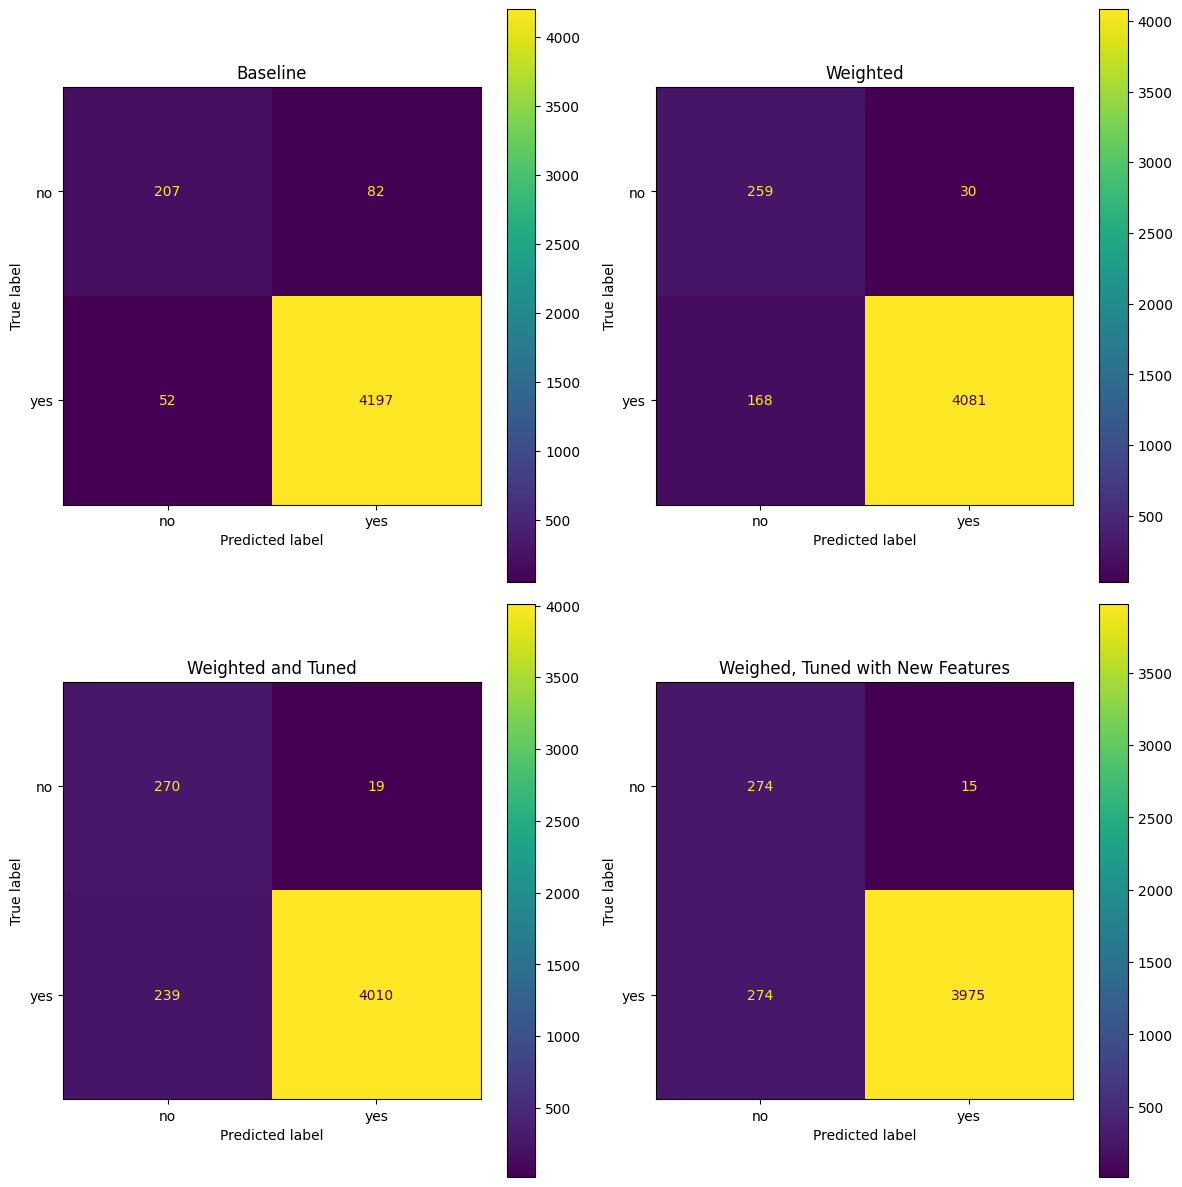

In [ ]:
baseline_xg_report = pd.DataFrame(xg_metrics['xg_classification_report']).transpose()
weighted_xg_report = pd.DataFrame(xg_metrics_weighted['xg_classification_report']).transpose()
tuned_xg_report = pd.DataFrame(xg_metrics_tuned_recall_0['xg_classification_report']).transpose()
new_features_xg_report = pd.DataFrame(xg_metrics_new_features['xg_classification_report']).transpose()

print(f"Baseline XGBoost Report: {baseline_xg_report}")
print("\n")
print(f"Weight XGBoost Report: {weighted_xg_report}")
print("\n")
print(f"Weighted and Tuned XGBoost Report: {tuned_xg_report}")
print("\n")
print(f"Weighted, Tuned and New Features XGBoost Report: {new_features_xg_report}")


fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # 2x2 grid

# Baseline confusion matrix
ConfusionMatrixDisplay(xg_metrics['xg_confusion_matrix'], display_labels=["no", "yes"]).plot(ax=axs[0, 0], cmap="viridis")
axs[0, 0].set_title('Baseline')

# Weighted confusion matrix
ConfusionMatrixDisplay(xg_metrics_weighted['xg_confusion_matrix'], display_labels=["no", "yes"]).plot(ax=axs[0, 1], cmap="viridis")
axs[0, 1].set_title('Weighted')

# Weighted and tuned confusion matrix
ConfusionMatrixDisplay(xg_metrics_tuned_recall_0['xg_confusion_matrix'], display_labels=["no", "yes"]).plot(ax=axs[1, 0], cmap="viridis")
axs[1, 0].set_title('Weighted and Tuned')

# New features confusion matrix
ConfusionMatrixDisplay(xg_metrics_new_features['xg_confusion_matrix'], display_labels=["no", "yes"]).plot(ax=axs[1, 1], cmap="viridis")
axs[1, 1].set_title('Weighed, Tuned with New Features')

# Adjust layout for better display
plt.tight_layout()
plt.show()

New features improve the recall even more ! These two features obviously do effect the likelihood of a student to drop out.

 makes intuitive sense, if students a

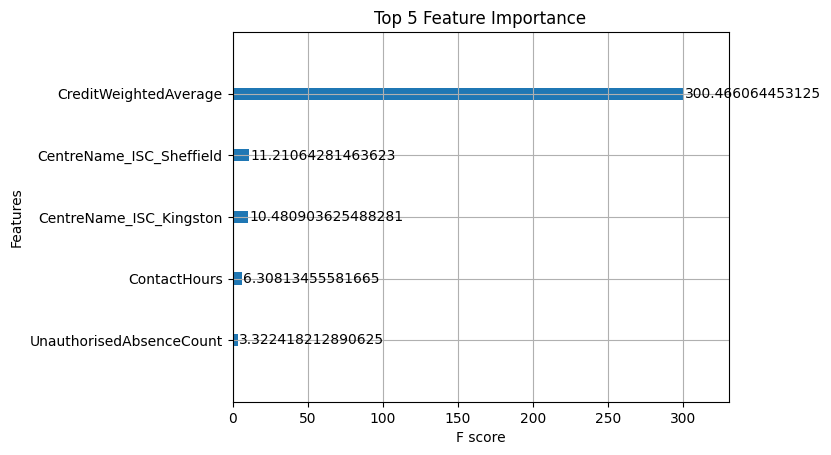

In [ ]:
xgb.plot_importance(xg_model_tuned, max_num_features=5, importance_type='gain', title='Top 5 Feature Importance')

# Show the plot
plt.show()

In [ ]:
!pip install shap

import shap


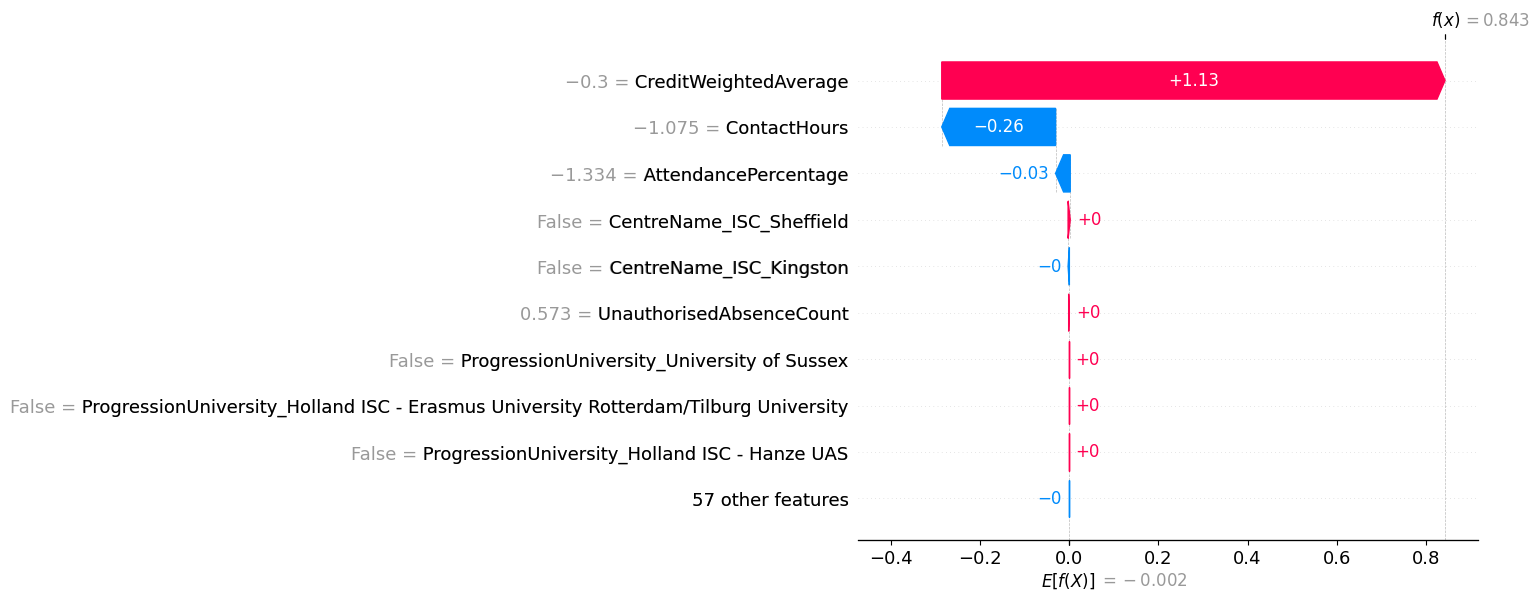

In [ ]:
# Load the SHAP explainer for the XGBoost model
explainer = shap.Explainer(xg_model_tuned)

# Select one specific instance (e.g., the first instance in the test set)
X_test_sample = X_test.iloc[0:1]  # You can change the index to examine other instances

# Calculate SHAP values for the instance
shap_values = explainer(X_test_sample)

# Create the SHAP waterfall plot for this instance
shap.plots.waterfall(shap_values[0])

**This is very interesting, a high contact hours is the largest driver toward an f(x) = 0. The business/educational institution would like to know this i imagine**

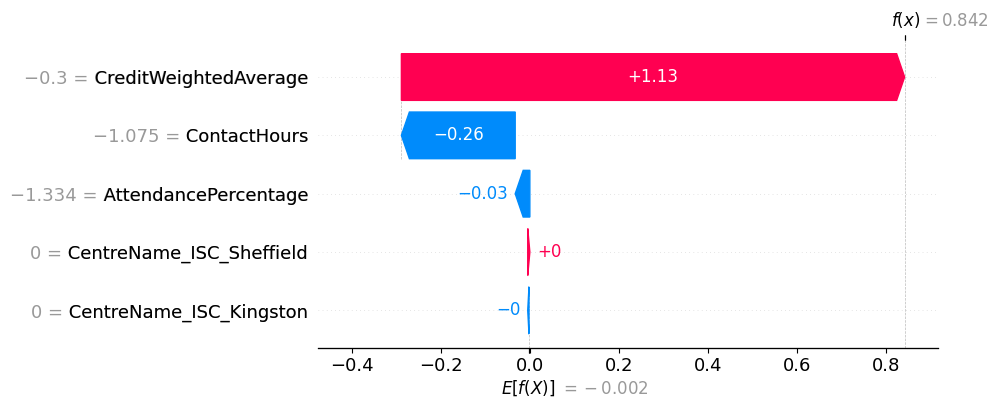

In [ ]:
shap_values_instance = shap_values[0]

top_5_indices = np.argsort(np.abs(shap_values_instance.values))[-5:]

# Create a new SHAP values object with only the top 5 features
shap_values_top5 = shap_values_instance[top_5_indices]

shap.plots.waterfall(shap_values_top5)

# Neural Network


In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [ ]:
X.head()

,IsFirstIntake,CreditWeightedAverage,UnauthorisedAbsenceCount,Age,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,...,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam,ContactHours,AttendancePercentage
1,0,0.528102,-0.879400,0.688948,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.685259,0.777768
2,0,0.165859,-0.852501,0.064481,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.581919,0.777768
3,1,0.424604,-0.610409,0.376714,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.043335,0.585770
5,1,0.786847,-0.933198,0.064481,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.219712,0.905767
7,0,0.269357,-0.341417,-0.559986,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.694654,0.073775


In [ ]:
# drop contacthours and attendancepercentage from X

X = X.drop(['ContactHours', 'AttendancePercentage'], axis=1)


In [ ]:
X.head()

,IsFirstIntake,CreditWeightedAverage,UnauthorisedAbsenceCount,Age,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
1,0,0.528102,-0.879400,0.688948,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,0,0.165859,-0.852501,0.064481,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,0.424604,-0.610409,0.376714,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,1,0.786847,-0.933198,0.064481,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,0,0.269357,-0.341417,-0.559986,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify = y_train)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer

# Step 4: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9348 - loss: 0.2168 - val_accuracy: 0.9758 - val_loss: 0.0718
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9716 - loss: 0.0780 - val_accuracy: 0.9752 - val_loss: 0.0715
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.0749 - val_accuracy: 0.9736 - val_loss: 0.0688
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.0742 - val_accuracy: 0.9730 - val_loss: 0.0667
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.0694 - val_accuracy: 0.9741 - val_loss: 0.0685
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0711 - val_accuracy: 0.9741 - val_loss: 0.0684
Epoch 7/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0665 - val_accuracy: 0.9741 - val_loss: 0.0669
Epoch 8/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0624 - val_accuracy: 0.9730 - val_

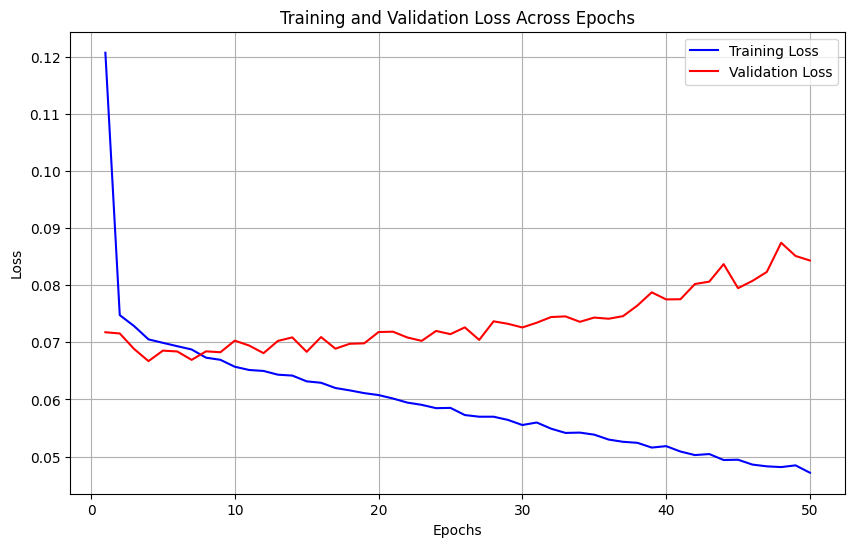

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test Set Performance (Saved):
Accuracy: 0.9731159100925518
Precision: 0.9808902353763691
Recall: 0.9905860202400565
AUC: 0.9786552667389272

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.77       289
           1       0.98      0.99      0.99      4249

    accuracy                           0.97      4538
   macro avg       0.91      0.85      0.88      4538
weighted avg       0.97      0.97      0.97      4538



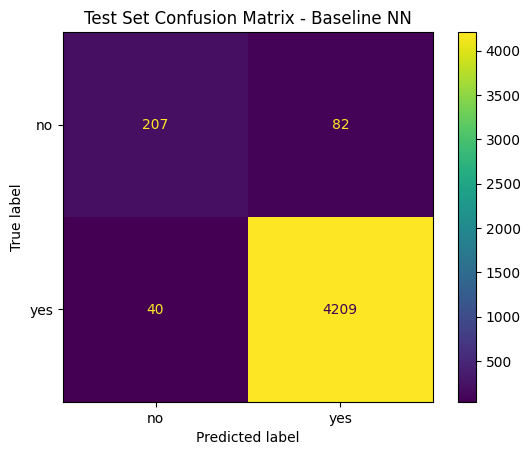

In [ ]:
y_pred_test = (model.predict(X_test) > 0.5).astype("int32")
y_pred_proba_test = model.predict(X_test)  # For AUC

# Step 2: Save performance metrics into a dictionary
nn_baseline_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_test),
    "precision": precision_score(y_test, y_pred_test),
    "recall": recall_score(y_test, y_pred_test),
    "auc": roc_auc_score(y_test, y_pred_proba_test),
    "classification_report": classification_report(y_test, y_pred_test, output_dict=True),  # Save as a dictionary for easy comparison
    "confusion_matrix": confusion_matrix(y_test, y_pred_test)  # Store confusion matrix for later
}


print("Test Set Performance (Saved):")
print(f"Accuracy: {nn_baseline_metrics['accuracy']}")
print(f"Precision: {nn_baseline_metrics['precision']}")
print(f"Recall: {nn_baseline_metrics['recall']}")
print(f"AUC: {nn_baseline_metrics['auc']}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

# Save and display the confusion matrix
cm_test = nn_baseline_metrics["confusion_matrix"]
ConfusionMatrixDisplay(cm_test, display_labels=["no", "yes"]).plot()
plt.title("Test Set Confusion Matrix - Baseline NN")
plt.show()


Performance indicators are high. Model overfits after 10 epochs. Recall for 0 is 0.72 - this is not high enough.As with the XGBoost, lets use class weights in the loss function so that the model pays more attention to this class.



In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=[0, 1], y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Fit the model with class weights
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1, class_weight=class_weight_dict)

In [ ]:
y_train

,CompletedCourse
21290,1
76,1
10340,1
14391,1
7384,1
...,...
8584,1
10061,1
12439,1
8910,0


Epoch 1/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9556 - loss: 0.1210 - val_accuracy: 0.9526 - val_loss: 0.1368
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9553 - loss: 0.1002 - val_accuracy: 0.9471 - val_loss: 0.1494
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9574 - loss: 0.0915 - val_accuracy: 0.9372 - val_loss: 0.1944
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9583 - loss: 0.0957 - val_accuracy: 0.9543 - val_loss: 0.1463
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9603 - loss: 0.0911 - val_accuracy: 0.9576 - val_loss: 0.1286
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9609 - loss: 0.0890 - val_accuracy: 0.9559 - val_loss: 0.1394
Epoch 7/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9595 - loss: 0.0874 - val_accuracy: 0.9515 - val_loss: 0.1393
Epoch 8/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9616 - loss: 0.0868 - val_accuracy: 0.

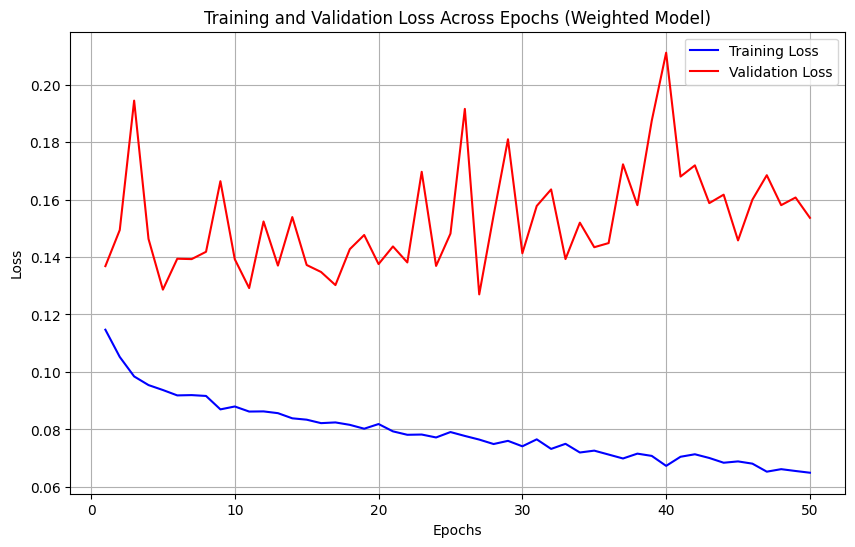

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Set Performance (Weighted Model):
Accuracy: 0.9583516967827237
Precision: 0.9917635658914729
Recall: 0.9635208284302189
AUC: 0.9731392120759536

Classification Report (Weighted Model):
               precision    recall  f1-score   support

           0       0.62      0.88      0.73       289
           1       0.99      0.96      0.98      4249

    accuracy                           0.96      4538
   macro avg       0.81      0.92      0.85      4538
weighted avg       0.97      0.96      0.96      4538



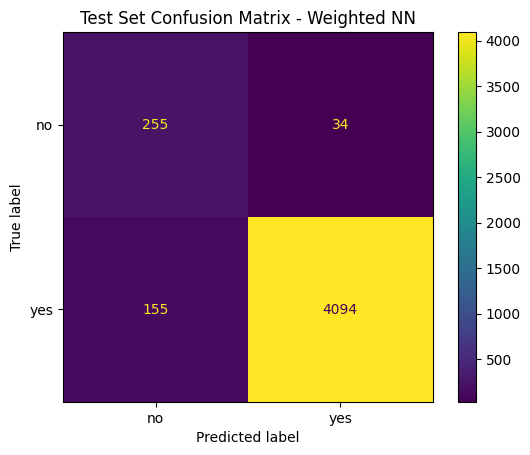

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Step 1: Ensure y_train is a NumPy array
y_train_np = np.array(y_train)

# Step 2: Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train_np)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Step 3: Fit the model with class weights
history = model.fit(X_train, y_train_np, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1, class_weight=class_weight_dict)



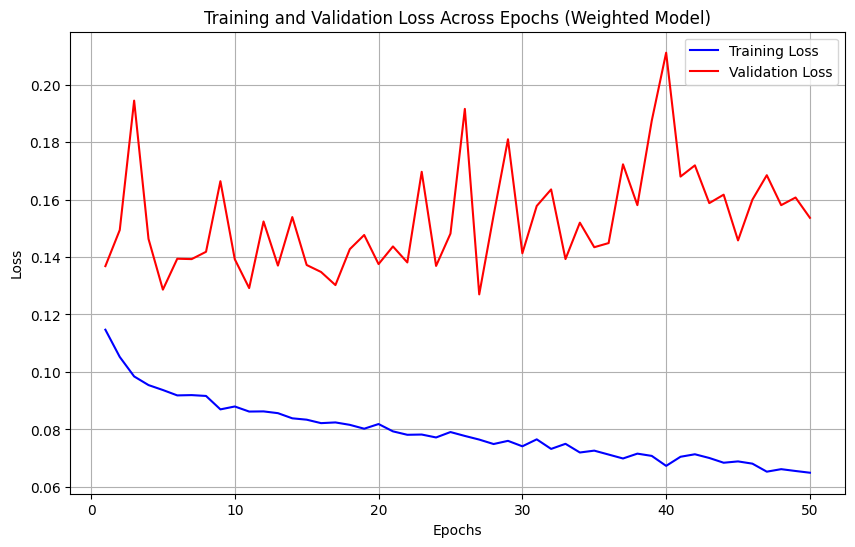

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Set Performance (Weighted Model):
Accuracy: 0.9583516967827237
Precision: 0.9917635658914729
Recall: 0.9635208284302189
AUC: 0.9731392120759536

Classification Report (Weighted Model):
               precision    recall  f1-score   support

           0       0.62      0.88      0.73       289
           1       0.99      0.96      0.98      4249

    accuracy                           0.96      4538
   macro avg       0.81      0.92      0.85      4538
weighted avg       0.97      0.96      0.96      4538



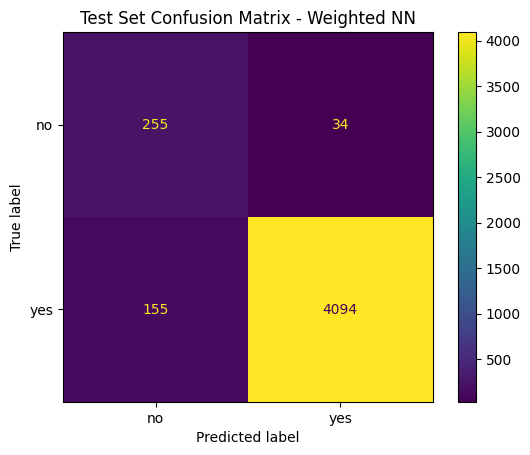

In [ ]:
# Step 4: Plot training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss Across Epochs (Weighted Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Get predictions and calculate performance metrics for the weighted model
y_pred_test_weighted = (model.predict(X_test) > 0.5).astype("int32")
y_pred_proba_test_weighted = model.predict(X_test)  # For AUC

# Step 6: Save performance metrics into a dictionary
nn_weighted_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_test_weighted),
    "precision": precision_score(y_test, y_pred_test_weighted),
    "recall": recall_score(y_test, y_pred_test_weighted),
    "auc": roc_auc_score(y_test, y_pred_proba_test_weighted),
    "classification_report": classification_report(y_test, y_pred_test_weighted, output_dict=True),
    "confusion_matrix": confusion_matrix(y_test, y_pred_test_weighted)
}

# Step 7: Display the saved metrics
print("Test Set Performance (Weighted Model):")
print(f"Accuracy: {nn_weighted_metrics['accuracy']}")
print(f"Precision: {nn_weighted_metrics['precision']}")
print(f"Recall: {nn_weighted_metrics['recall']}")
print(f"AUC: {nn_weighted_metrics['auc']}")

# Print the full classification report
print("\nClassification Report (Weighted Model):\n", classification_report(y_test, y_pred_test_weighted))

# Step 8: Display the confusion matrix
cm_test_weighted = nn_weighted_metrics["confusion_matrix"]
ConfusionMatrixDisplay(cm_test_weighted, display_labels=["no", "yes"]).plot()
plt.title("Test Set Confusion Matrix - Weighted NN")
plt.show()


Right, so recall for - class has gone up to 0.88 which is a big step in the right direction. However a very odd loss graph. The validation loss is volatile across epochs - lets do hyperparameter tuning now and see if this fixes it.

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.utils.class_weight import compute_class_weight

# Step 1: Define a function that creates a Keras model
def create_model(neurons=32, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))  # First hidden layer
    model.add(Dense(neurons, activation=activation))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Calculate class weights to handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Step 3: Wrap the Keras model in a KerasClassifier for use with GridSearchCV
model = KerasClassifier(
    model=create_model,
    epochs=50,
    batch_size=32,
    verbose=0,
)

# Step 4: Define the grid of hyperparameters to tune
param_grid = {
    'model__neurons': [32, 64, 128],  # Number of neurons in hidden layers
    'model__activation': ['relu', 'tanh', 'sigmoid'],  # Activation functions
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],  # Different optimizers
}

# Step 5: Perform Grid Search with cross-validation, including class weights
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

# Step 6: Fit the grid search with class weights
grid_result = grid.fit(X_train, y_train, class_weight=class_weight_dict)

# Step 7: Print the best hyperparameters and corresponding accuracy
print(f"Best Hyperparameters: {grid_result.best_params_}")
print(f"Best Accuracy: {grid_result.best_score_}")

# Step 8: Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred_test = (best_model.predict(X_test) > 0.5).astype("int32")
y_pred_proba_test = best_model.predict(X_test)

# Save performance metrics in nn_weighted_tuned_metrics
nn_weighted_tuned_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_test),
    "precision": precision_score(y_test, y_pred_test),
    "recall": recall_score(y_test, y_pred_test),
    "auc": roc_auc_score(y_test, y_pred_proba_test),
    "classification_report": classification_report(y_test, y_pred_test, output_dict=True),
    "confusion_matrix": confusion_matrix(y_test, y_pred_test)
}



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Hyperparameters: {'model__activation': 'relu', 'model__neurons': 128, 'model__optimizer': 'rmsprop'}
Best Accuracy: 0.9579377818440005


In [ ]:
print(type(y_train))
print(y_train.head())  # If it's a Pandas Series/DataFrame

<class 'pandas.core.series.Series'>
21290    1
76       1
10340    1
14391    1
7384     1
Name: CompletedCourse, dtype: int64



Test Set Performance of Best Model:
Accuracy: 0.9579109739973557
Precision: 0.9931939718035975
Recall: 0.9616380324782302
AUC: 0.9323761096647205

Classification Report (Weighted and Tuned):
               precision    recall  f1-score   support

           0       0.62      0.90      0.73       289
           1       0.99      0.96      0.98      4249

    accuracy                           0.96      4538
   macro avg       0.80      0.93      0.85      4538
weighted avg       0.97      0.96      0.96      4538



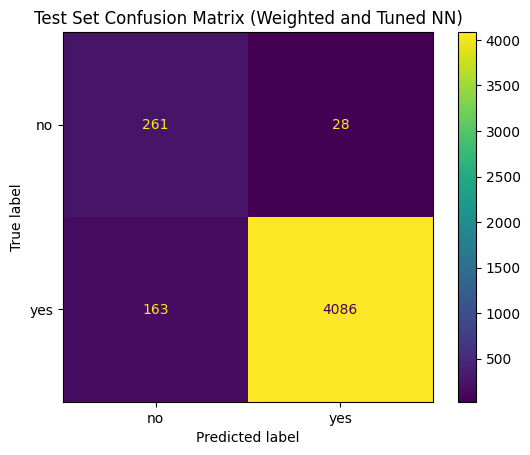

In [ ]:
# Step 9: Print the test set performance of the best model
print("\nTest Set Performance of Best Model:")
print(f"Accuracy: {nn_weighted_tuned_metrics['accuracy']}")
print(f"Precision: {nn_weighted_tuned_metrics['precision']}")
print(f"Recall: {nn_weighted_tuned_metrics['recall']}")
print(f"AUC: {nn_weighted_tuned_metrics['auc']}")

# Print the classification report
print("\nClassification Report (Weighted and Tuned):\n", classification_report(y_test, y_pred_test))

# Confusion matrix
cm_test = nn_weighted_tuned_metrics["confusion_matrix"]
ConfusionMatrixDisplay(cm_test, display_labels=["no", "yes"]).plot()
plt.title("Test Set Confusion Matrix (Weighted and Tuned NN)")
plt.show()


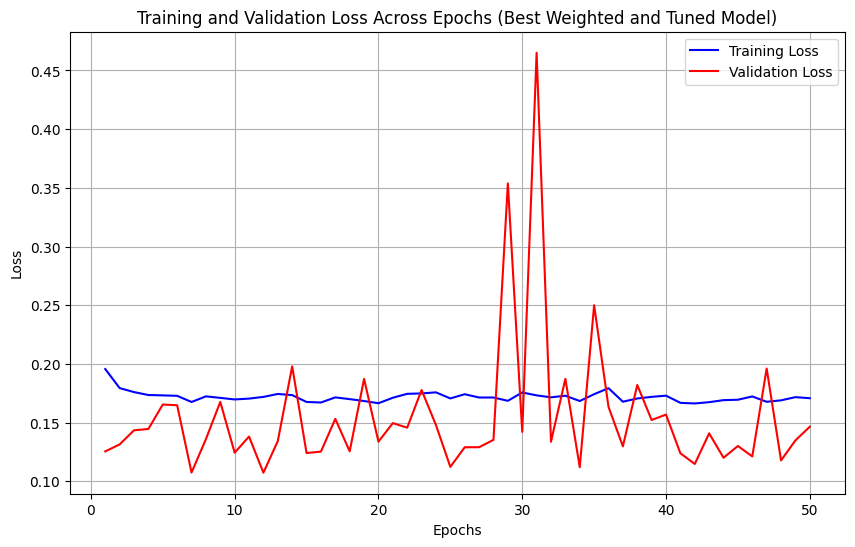

In [ ]:
# Plot the loss curves for the weighted and tuned model
train_loss = history_best_model.history['loss']
val_loss = history_best_model.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss Across Epochs (Best Weighted and Tuned Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

validation loss lower than training loss! still quite jumpy though so more tuning and/or regularisation would be preferable

But importantly, 0 recall improving still. lets add the two other features back in


In [ ]:
X.head()

,IsFirstIntake,CreditWeightedAverage,UnauthorisedAbsenceCount,Age,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,...,ProgressionUniversity_University College Dublin,ProgressionUniversity_University of Aberdeen,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam
1,0,0.528102,-0.879400,0.688948,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,0,0.165859,-0.852501,0.064481,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1,0.424604,-0.610409,0.376714,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,1,0.786847,-0.933198,0.064481,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,0,0.269357,-0.341417,-0.559986,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
X['ContactHours'] = original_df['ContactHours']
X['AttendancePercentage'] = original_df['AttendancePercentage']

# Standardizing the two columns, dont really need to do it for percentage, but its fine
scaler = StandardScaler()
X[['ContactHours', 'AttendancePercentage']] = scaler.fit_transform(X[['ContactHours', 'AttendancePercentage']])

X.head()

,IsFirstIntake,CreditWeightedAverage,UnauthorisedAbsenceCount,Age,CentreName_ISC_Cardiff,CentreName_ISC_Dublin,CentreName_ISC_Durham,CentreName_ISC_Holland,CentreName_ISC_Huddersfield,CentreName_ISC_Kingston,...,ProgressionUniversity_University of Huddersfield,ProgressionUniversity_University of Leeds,ProgressionUniversity_University of Lincoln,ProgressionUniversity_University of Sheffield International College,ProgressionUniversity_University of Strathclyde,ProgressionUniversity_University of Surrey,ProgressionUniversity_University of Sussex,ProgressionUniversity_VU Amsterdam,ContactHours,AttendancePercentage
1,0,0.528102,-0.879400,0.688948,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.685259,0.777768
2,0,0.165859,-0.852501,0.064481,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.581919,0.777768
3,1,0.424604,-0.610409,0.376714,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,0.043335,0.585770
5,1,0.786847,-0.933198,0.064481,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.219712,0.905767
7,0,0.269357,-0.341417,-0.559986,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-1.694654,0.073775


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify = y_train)

In [ ]:
y_train_np = np.array(y_train)
y_val_np = np.array(y_val)
y_test_np = np.array(y_test)

In [ ]:
nn_best_params = {
    'neurons': 128,             # Best number of neurons in each layer
    'activation': 'relu',       # Best activation function
    'optimizer': 'rmsprop',     # Best optimizer
}

# Rebuild the best neural network model with the new features
best_model_new_features = Sequential()
best_model_new_features.add(Dense(nn_best_params['neurons'], input_dim=X_train.shape[1], activation=nn_best_params['activation']))
best_model_new_features.add(Dense(nn_best_params['neurons'], activation=nn_best_params['activation']))
best_model_new_features.add(Dense(1, activation='sigmoid'))

# Compile the model using the best optimizer found
best_model_new_features.compile(optimizer=nn_best_params['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the new training and validation set
history_new_features = best_model_new_features.fit(
    X_train, y_train_np, epochs=50, batch_size=32,
    validation_data=(X_val, y_val_np), verbose=1, class_weight=class_weight_dict
)

# Make predictions on the test set
y_pred_test_new = (best_model_new_features.predict(X_test) > 0.5).astype("int32")
y_pred_proba_test_new = best_model_new_features.predict(X_test)

# Save the performance metrics for the new model
nn_new_features = {
    "accuracy": accuracy_score(y_test_np, y_pred_test_new),
    "precision": precision_score(y_test_np, y_pred_test_new),
    "recall": recall_score(y_test_np, y_pred_test_new),
    "auc": roc_auc_score(y_test_np, y_pred_proba_test_new),
    "classification_report": classification_report(y_test_np, y_pred_test_new, output_dict=True),
    "confusion_matrix": confusion_matrix(y_test_np, y_pred_test_new)
}

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9227 - loss: 0.2203 - val_accuracy: 0.9537 - val_loss: 0.1180
Epoch 2/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9537 - loss: 0.1561 - val_accuracy: 0.9559 - val_loss: 0.1159
Epoch 3/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9562 - loss: 0.1404 - val_accuracy: 0.9587 - val_loss: 0.1099
Epoch 4/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9571 - loss: 0.1296 - val_accuracy: 0.9592 - val_loss: 0.1044
Epoch 5/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9588 - loss: 0.1263 - val_accuracy: 0.9570 - val_loss: 0.1217
Epoch 6/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9585 - loss: 0.1368 - val_accuracy: 0.9653 - val_loss: 0.0906
Epoch 7/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9609 - loss: 0.1190 - val_accuracy: 0.9592 - val_loss: 0.1237
Epoch 8/50
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9613 - loss: 0.1274 - val_accuracy: 0.


Test Set Performance with New Features:
Accuracy: 0.9488761568973116
Precision: 0.9938529628718957
Recall: 0.9512826547422923
AUC: 0.9861933725908233

Classification Report (New Features):
               precision    recall  f1-score   support

           0       0.56      0.91      0.69       289
           1       0.99      0.95      0.97      4249

    accuracy                           0.95      4538
   macro avg       0.78      0.93      0.83      4538
weighted avg       0.97      0.95      0.95      4538



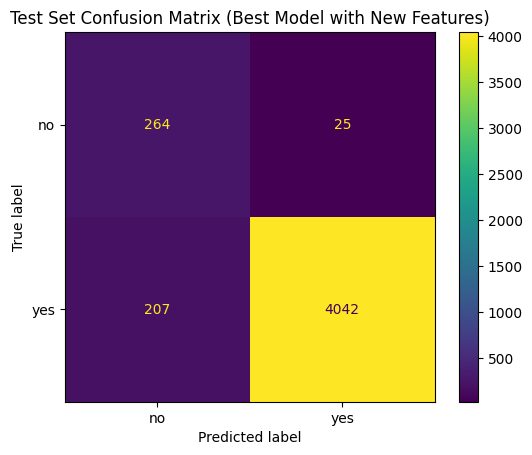

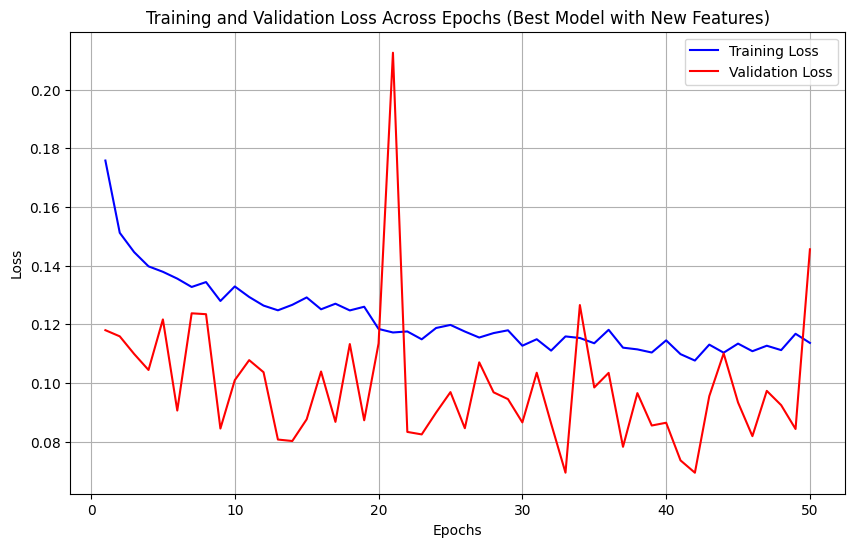

In [ ]:
# Print the performance metrics
print("\nTest Set Performance with New Features:")
print(f"Accuracy: {nn_new_features['accuracy']}")
print(f"Precision: {nn_new_features['precision']}")
print(f"Recall: {nn_new_features['recall']}")
print(f"AUC: {nn_new_features['auc']}")

# Print the classification report
print("\nClassification Report (New Features):\n", classification_report(y_test_np, y_pred_test_new))

# Plot the confusion matrix
ConfusionMatrixDisplay(nn_new_features['confusion_matrix'], display_labels=["no", "yes"]).plot()
plt.title("Test Set Confusion Matrix (Best Model with New Features)")
plt.show()

# Plot the training and validation loss curves
train_loss_new = history_new_features.history['loss']
val_loss_new = history_new_features.history['val_loss']
epochs_new = range(1, len(train_loss_new) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_new, train_loss_new, 'b-', label='Training Loss')
plt.plot(epochs_new, val_loss_new, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss Across Epochs (Best Model with New Features)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

It's interesting here how precision and total recall went down slightly, precision stayed the same but AUC increased a lot. Still, the key thing we are interested in is the 0-recall, which did improve

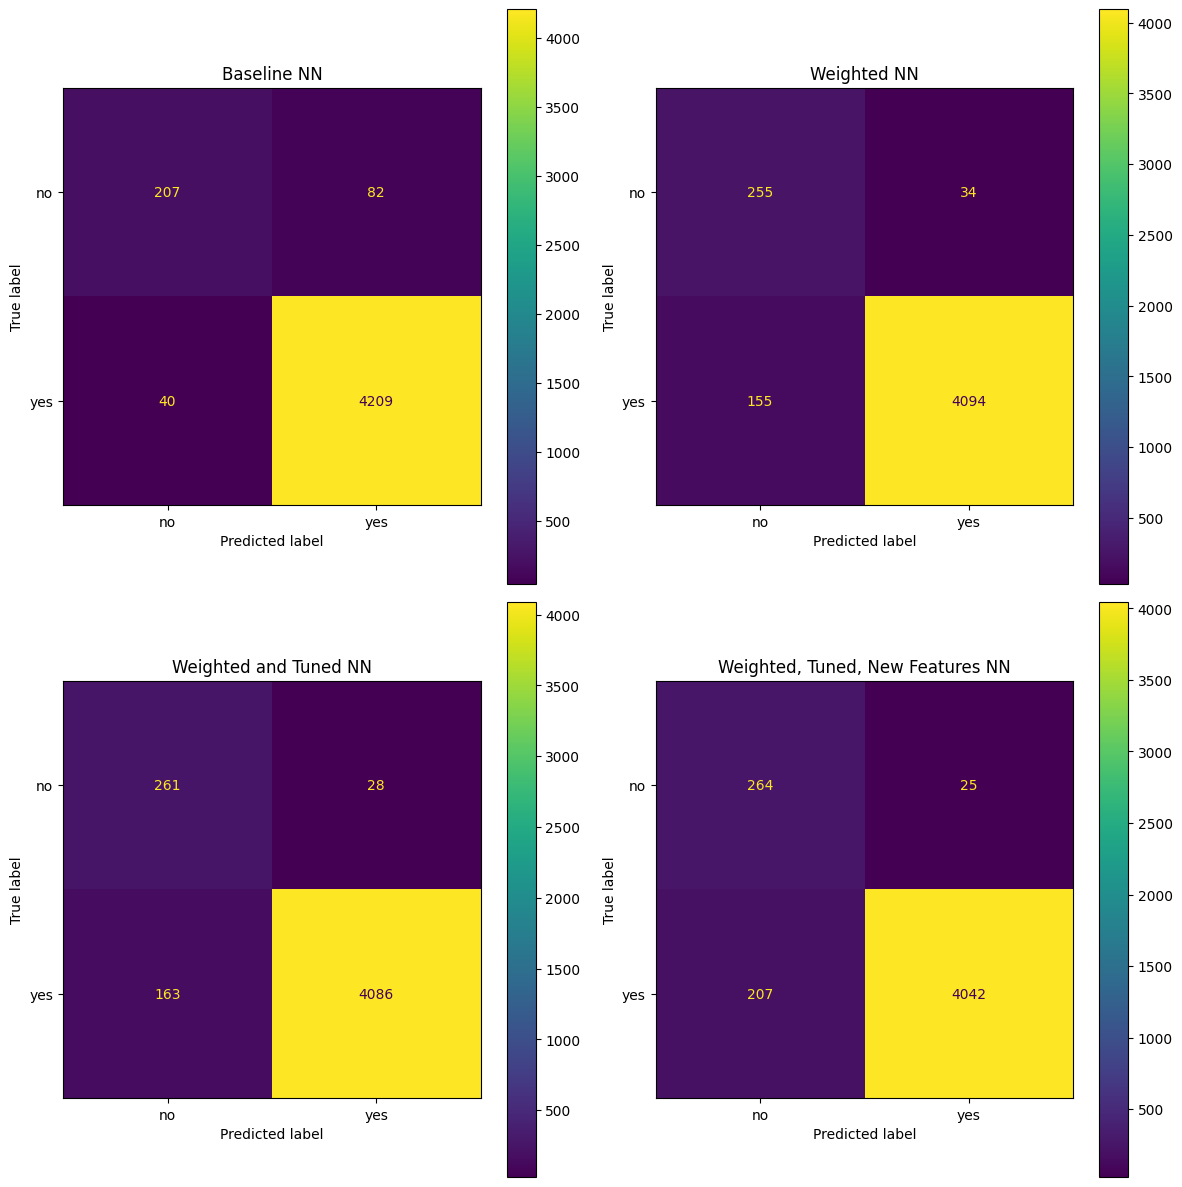

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot confusion matrix for the baseline NN
ConfusionMatrixDisplay(nn_baseline_metrics['confusion_matrix'], display_labels=["no", "yes"]).plot(ax=axs[0, 0])
axs[0, 0].set_title("Baseline NN")

# Plot confusion matrix for the weighted NN
ConfusionMatrixDisplay(nn_weighted_metrics['confusion_matrix'], display_labels=["no", "yes"]).plot(ax=axs[0, 1])
axs[0, 1].set_title("Weighted NN")

# Plot confusion matrix for the tuned NN
ConfusionMatrixDisplay(nn_weighted_tuned_metrics['confusion_matrix'], display_labels=["no", "yes"]).plot(ax=axs[1, 0])
axs[1, 0].set_title("Weighted and Tuned NN")

# Plot confusion matrix for the tuned NN with new features
ConfusionMatrixDisplay(nn_new_features['confusion_matrix'], display_labels=["no", "yes"]).plot(ax=axs[1, 1])
axs[1, 1].set_title("Weighted, Tuned, New Features NN")

# Adjust the layout
plt.tight_layout()
plt.show()

Adding contact hours and percentage features, as in the XGBoost model improves our model's capability to detect students dropping out.

This tells us that these two features are correlated to the drop out rate, and maybe even causal. Intuitively this makes sense, students who attend fewer classes are likely to struggle to pass exams. Alternatively the reasons why some students are unable to attend lessons may also be the reasons why the students drop out.

# Surplus Code

I previously did this entire project without any weight tuning. I was just focussed on getting the four performance indicators as close to 1 as possible, before re-reading my work and understanding that the 0-class recall was the most important performance indicator in this specific business case

In [ ]:
best_model_new_features = Sequential()
best_model_new_features.add(Dense(best_params['model__neurons'], input_dim=X_train.shape[1], activation=best_params['model__activation']))
best_model_new_features.add(Dense(best_params['model__neurons'], activation=best_params['model__activation']))
best_model_new_features.add(Dense(1, activation='sigmoid'))

# Compile the model with the best optimizer found
best_model_new_features.compile(optimizer=best_params['model__optimizer'], loss='binary_crossentropy', metrics=['accuracy'])

# Step 2: Fit the model on the new training and validation set (with class weights)
history_new_features = best_model_new_features.fit(
    X_train, y_train_np, epochs=50, batch_size=32,
    validation_data=(X_val, y_val_np), verbose=1, class_weight=class_weight_dict
)

# Step 3: Make predictions on the test set
y_pred_test_new = (best_model_new_features.predict(X_test) > 0.5).astype("int32")
y_pred_proba_test_new = best_model_new_features.predict(X_test)

# Step 4: Save the performance metrics for the new model
nn_new_features = {
    "accuracy": accuracy_score(y_test_np, y_pred_test_new),
    "precision": precision_score(y_test_np, y_pred_test_new),
    "recall": recall_score(y_test_np, y_pred_test_new),
    "auc": roc_auc_score(y_test_np, y_pred_proba_test_new),
    "classification_report": classification_report(y_test_np, y_pred_test_new, output_dict=True),
    "confusion_matrix": confusion_matrix(y_test_np, y_pred_test_new)
}

KeyError: 'model__neurons'

In [ ]:
# Convert y_train and y_val to numpy arrays
y_train_np = np.array(y_train)
y_val_np = np.array(y_val)

# Step 1: Rebuild the best model using the tuned hyperparameters
best_model_new_features = Sequential()
best_model_new_features.add(Dense(best_params['neurons'], input_dim=X_train.shape[1], activation=best_params['activation']))
best_model_new_features.add(Dense(best_params['neurons'], activation=best_params['activation']))
best_model_new_features.add(Dense(1, activation='sigmoid'))

# Compile the model with the best optimizer found
best_model_new_features.compile(optimizer=best_params['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])

# Step 2: Fit the model on the new training and validation set (with class weights)
history_new_features = best_model_new_features.fit(
    X_train, y_train_np, epochs=50, batch_size=32,
    validation_data=(X_val, y_val_np), verbose=1, class_weight=class_weight_dict
)

# Step 3: Make predictions on the test set
y_pred_test_new = (best_model_new_features.predict(X_test) > 0.5).astype("int32")
y_pred_proba_test_new = best_model_new_features.predict(X_test)

# Step 4: Save the performance metrics for the new model
nn_new_features = {
    "accuracy": accuracy_score(y_test_np, y_pred_test_new),
    "precision": precision_score(y_test_np, y_pred_test_new),
    "recall": recall_score(y_test_np, y_pred_test_new),
    "auc": roc_auc_score(y_test_np, y_pred_proba_test_new),
    "classification_report": classification_report(y_test_np, y_pred_test_new, output_dict=True),
    "confusion_matrix": confusion_matrix(y_test_np, y_pred_test_new)
}



KeyError: 'neurons'

In [ ]:

# Step 5: Print the performance metrics
print("\nTest Set Performance with New Features:")
print(f"Accuracy: {nn_new_features['accuracy']}")
print(f"Precision: {nn_new_features['precision']}")
print(f"Recall: {nn_new_features['recall']}")
print(f"AUC: {nn_new_features['auc']}")

# Print the classification report
print("\nClassification Report (New Features):\n", classification_report(y_test_np, y_pred_test_new))

# Step 6: Plot confusion matrix
ConfusionMatrixDisplay(nn_new_features['confusion_matrix'], display_labels=["no", "yes"]).plot()
plt.title("Test Set Confusion Matrix (Best Model with New Features)")
plt.show()

# Step 7: Plot the training and validation loss curves
train_loss_new = history_new_features.history['loss']
val_loss_new = history_new_features.history['val_loss']
epochs_new = range(1, len(train_loss_new) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_new, train_loss_new, 'b-', label='Training Loss')
plt.plot(epochs_new, val_loss_new, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss Across Epochs (Best Model with New Features)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Hyperparameters: {'model__activation': 'relu', 'model__neurons': 128, 'model__optimizer': 'sgd'}
Best Accuracy: 0.9717137869465704

Test Set Performance of Best Model:
Accuracy: 0.9715733803437637
Precision: 0.981984089845578
Recall: 0.9877618263120734
AUC: 0.860662920076452


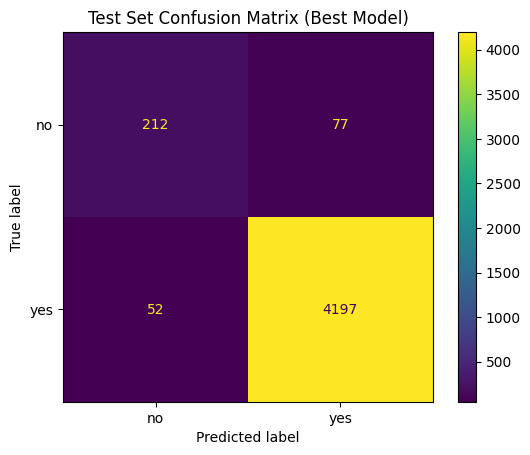

In [ ]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


# Step 1: Define a function that creates a Keras model
def create_model(neurons=32, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))  # First hidden layer
    model.add(Dense(neurons, activation=activation))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Wrap the Keras model in a KerasClassifier for use with GridSearchCV
# Notice we pass the parameters as `**kwargs` to `build_fn`
model = KerasClassifier(
    model=create_model,
    epochs=50,
    batch_size=32,
    verbose=0
)

# Step 3: Define the grid of hyperparameters to tune
param_grid = {
    'model__neurons': [32, 64, 128],           # Number of neurons in hidden layers
    'model__activation': ['relu', 'tanh', 'sigmoid'],  # Activation functions
    'model__optimizer': ['adam', 'rmsprop', 'sgd']  # Different optimizers
}

# Step 4: Perform Grid Search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

# Step 5: Fit the grid search
grid_result = grid.fit(X_train, y_train)

# Step 6: Print the best hyperparameters and corresponding accuracy
print(f"Best Hyperparameters: {grid_result.best_params_}")
print(f"Best Accuracy: {grid_result.best_score_}")

# Step 7: Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred_test = (best_model.predict(X_test) > 0.5).astype("int32")
y_pred_proba_test = best_model.predict(X_test)

# Performance metrics
print("\nTest Set Performance of Best Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Precision: {precision_score(y_test, y_pred_test)}")
print(f"Recall: {recall_score(y_test, y_pred_test)}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba_test)}")

# Confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm_test, display_labels=["no", "yes"]).plot()
plt.title("Test Set Confusion Matrix (Best Model)")
plt.show()

Untuned model:

Accuracy: 0.9737769942706038

Precision: 0.9795633999071064

Recall: 0.9927041656860438

AUC: 0.9820466610910282


Tuned Model:

Accuracy: 0.9715733803437637

Precision: 0.981984089845578

Recall: 0.9877618263120734

AUC: 0.860662920076452

In [ ]:
# Performance metrics
print("\nTest Set Performance of Best Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Precision: {precision_score(y_test, y_pred_test)}")
print(f"Recall: {recall_score(y_test, y_pred_test)}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba_test)}")

print("Test Set Performance of Untuned Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Precision: {precision_score(y_test, y_pred_test)}")
print(f"Recall: {recall_score(y_test, y_pred_test)}")
print(f"AUC: {roc_auc_score(y_test, y_pred_proba_test)}")


Test Set Performance of Best Model:
Accuracy: 0.9715733803437637
Precision: 0.981984089845578
Recall: 0.9877618263120734
AUC: 0.860662920076452
Test Set Performance of Untuned Model:
Accuracy: 0.9715733803437637
Precision: 0.981984089845578
Recall: 0.9877618263120734
AUC: 0.860662920076452


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


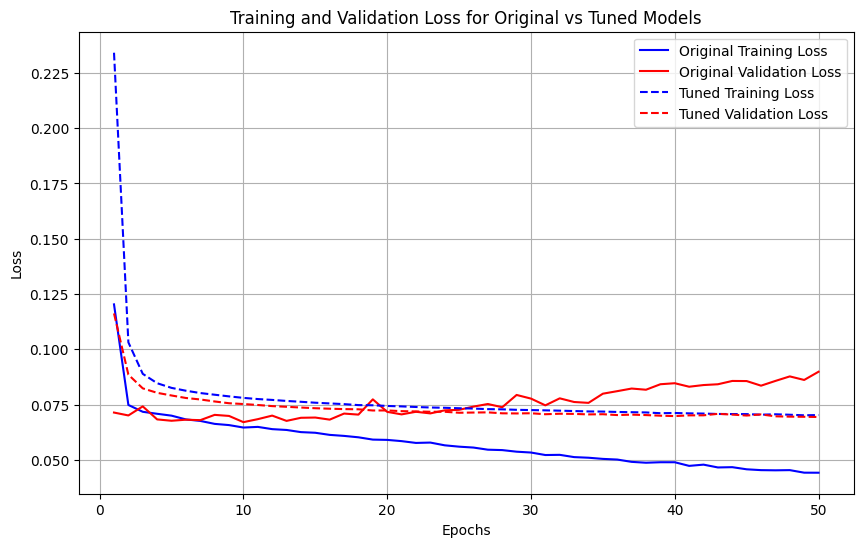

In [ ]:
# Step 1: Define the function to create the models
def create_model(neurons=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Train the untuned model (original settings)
original_model = create_model(neurons=64, activation='relu', optimizer=Adam(learning_rate=0.001))

history_original = original_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=0
)

# Step 3: Train the tuned model (best hyperparameters from tuning)
best_model = create_model(neurons=128, activation='relu', optimizer=SGD(learning_rate=0.01))

history_best = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=0
)

# Step 4: Plot the loss curves for both models
epochs = range(1, 51)

plt.figure(figsize=(10, 6))

# Plot loss for original (untuned) model
plt.plot(epochs, history_original.history['loss'], 'b-', label='Original Training Loss')
plt.plot(epochs, history_original.history['val_loss'], 'r-', label='Original Validation Loss')

# Plot loss for tuned (best) model
plt.plot(epochs, history_best.history['loss'], 'b--', label='Tuned Training Loss')
plt.plot(epochs, history_best.history['val_loss'], 'r--', label='Tuned Validation Loss')

# Add labels and legend
plt.title('Training and Validation Loss for Original vs Tuned Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

right so need to go past 10 epochs.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify = y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Test Set Performance of Original (Untuned) Model:
Accuracy: 0.9808285588364919
Precision: 0.9903393025447691
Recall: 0.9891739232760649
AUC: 0.9841460763004688


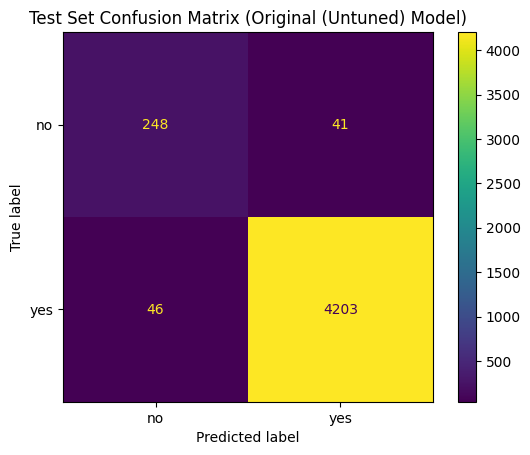

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Test Set Performance of Tuned (Best) Model:
Accuracy: 0.9781842221242838
Precision: 0.9873179896665101
Recall: 0.9894092727700635
AUC: 0.9889068138157482


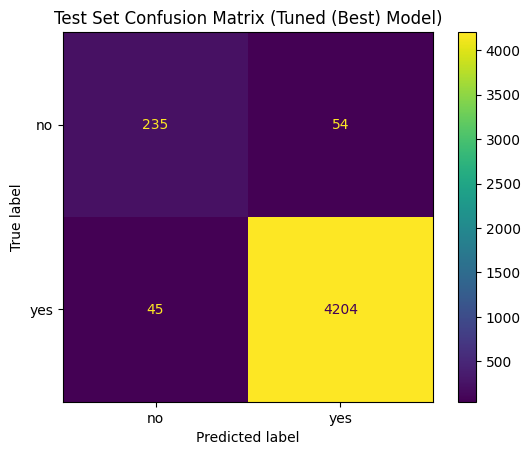


Comparison of Untuned Model Performance (Before vs After New Features):
Accuracy: Before=0.9737769942706038 vs After=0.9808285588364919
Precision: Before=0.9795633999071064 vs After=0.9903393025447691
Recall: Before=0.9927041656860438 vs After=0.9891739232760649
AUC: Before=0.9820466610910282 vs After=0.9841460763004688

Comparison of Tuned Model Performance (Before vs After New Features):
Accuracy: Before=0.9715733803437637 vs After=0.9781842221242838
Precision: Before=0.981984089845578 vs After=0.9873179896665101
Recall: Before=0.9877618263120734 vs After=0.9894092727700635
AUC: Before=0.860662920076452 vs After=0.9889068138157482


In [ ]:
def create_model(neurons=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output layer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the untuned model (original settings)
original_model = create_model(neurons=64, activation='relu', optimizer=Adam(learning_rate=0.001))
original_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Train the tuned model (best settings from hyperparameter tuning)
best_model = create_model(neurons=128, activation='relu', optimizer=SGD(learning_rate=0.01))
best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Evaluate models on the test set
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Predicted labels
    y_pred_proba = model.predict(X_test)  # Predicted probabilities for AUC

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Print performance metrics
    print(f"\nTest Set Performance of {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"AUC: {auc}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["no", "yes"]).plot()
    plt.title(f"Test Set Confusion Matrix ({model_name})")
    plt.show()

    return accuracy, precision, recall, auc

# Evaluate the untuned (original) model
original_performance = evaluate_model(original_model, X_test, y_test, model_name="Original (Untuned) Model")

# Evaluate the tuned (best hyperparameters) model
tuned_performance = evaluate_model(best_model, X_test, y_test, model_name="Tuned (Best) Model")

# Compare performance with the original models before the two features were added
# Previous performance
previous_original_performance = {
    'accuracy': 0.9737769942706038,
    'precision': 0.9795633999071064,
    'recall': 0.9927041656860438,
    'auc': 0.9820466610910282
}

previous_tuned_performance = {
    'accuracy': 0.9715733803437637,
    'precision': 0.981984089845578,
    'recall': 0.9877618263120734,
    'auc': 0.860662920076452
}

# Print previous vs current performance
print("\nComparison of Untuned Model Performance (Before vs After New Features):")
print(f"Accuracy: Before={previous_original_performance['accuracy']} vs After={original_performance[0]}")
print(f"Precision: Before={previous_original_performance['precision']} vs After={original_performance[1]}")
print(f"Recall: Before={previous_original_performance['recall']} vs After={original_performance[2]}")
print(f"AUC: Before={previous_original_performance['auc']} vs After={original_performance[3]}")

print("\nComparison of Tuned Model Performance (Before vs After New Features):")
print(f"Accuracy: Before={previous_tuned_performance['accuracy']} vs After={tuned_performance[0]}")
print(f"Precision: Before={previous_tuned_performance['precision']} vs After={tuned_performance[1]}")
print(f"Recall: Before={previous_tuned_performance['recall']} vs After={tuned_performance[2]}")
print(f"AUC: Before={previous_tuned_performance['auc']} vs After={tuned_performance[3]}")